# Final Project Submission

Please fill out:
* Student name: <strong>Michael Mahoney</strong>
* Student pace: self paced / <strong>part time</strong> / full time
* Scheduled project review date/time: 8/14/2020
* Instructor name: <strong>James Irving</strong>
* Blog post URL: https://docs.google.com/document/d/1Sb2msBnLlz9RUp_k776FQQZIitmep13zvM5o2G64R-0/edit


# Project Overview
## Scope
The purpose of this project is to explore the King County Housing data to discover what variables are the best predictors of sale price. The following elements will be considered to be the primary scope of the project.

###  Question 1: If I have space to add an additional room, what should I put in the space if I want to increase my home value?
###  Question 2: If I have space to add an additional room, what should I put in the space?
###  Question 3: I'm looking to buy a house in King County. I like a lot of space and don't really care about the neighborhood. What area should I look in to get the most space for my money if I can only spend 400,000 dollars.
###  Question 4: I'm looking to sell my house but I don't have much money for renovations. What should I do to squeeze a little extra money out of the sale

## Methodology: CRISP-DM
In general the method behind the madness for this project was CRISP-DM. While you won't find any specific callouts like "This is the Business Understanding part!" the premise behind CRISP-DM informed each pass at creating more successful models. For brevity sake, the many iterations of this process were omitted (and likely deleted in a fit of rage!). If you have specific questions about different approaches please feel free to ask me. I likely tried it at some point. 

# Package Dependancies
* Numpy
* Pandas
* Matplotlib.pyplot
* scipy.stats
* Seaborn
* statsmodels
* scikit-learn
* datetime
* math
* datetime
* customModule

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels
from statsmodels.formula.api import ols
import datetime
from statsmodels.formula.api import ols
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

import customModule # As the name suggests, this is a custom module that can be found on the top level of this repo


In [2]:
# Toggle the following line to show all columns
pd.set_option('display.max_columns', None)

# Baseline Data-Preprocessing

## First Look

In [3]:
# Import the data set for pre-processing and save it to a variable
dfInitial = pd.read_csv('kc_house_data.csv')

#show some initial summary info
print(f'The DataFrame is of dimensions {dfInitial.shape} \n')
display(dfInitial.head())
display(dfInitial.describe())
display(dfInitial.info());


The DataFrame is of dimensions (21597, 21) 



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

From our info list we see that many of the data types have been imput incorrectly. We will now go through reassign the correct data types for use in the regression model.

## Changing Column Data Types

### Date-times

The date column appears to be the only datetime column. It is currectly assigned to dtype 'object' which is the string type in pandas. There is an approach that treats datetime objects as a linear flow in time. I'm rejecting that approach for this project. Time is very cyclic in human society and thus, in order to get the most information out of the data in the date column, we are going to seperate the date information into the three distinct columns: year, month and day of the week. Otherwise much of the information stored in the dates would be lost in a continuous numerical approach.  

In [4]:
# Use the datetime module to create the new columns
dfInitial['day'] = pd.to_datetime(dfInitial['date']).dt.day_name()
dfInitial['month'] = pd.DatetimeIndex(pd.to_datetime(dfInitial['date'])).month
dfInitial['year'] = pd.DatetimeIndex(pd.to_datetime(dfInitial['date'])).year
dfInitial['date']

# We drop the original date column which has been parted out into multiple pieces
dfInitial.drop(columns = 'date', inplace = True)

### Numerical

There also only appear to be one mis-typed numerical column, being 'sqft_basement'. Because the column has null values encoded as the question mark symbol '?', we will replace this with the none type and address this later.

In [5]:
# Divest the dataframe of the ? symbol in order to convert the column to a numeric type
dfInitial['sqft_basement'].loc[dfInitial['sqft_basement'] == '?'] = None
dfInitial['sqft_basement'] = pd.to_numeric(dfInitial['sqft_basement'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### Categorical

We now look to re-assign to categories. When looking at our columns, there are several instances of categories being coded as numerical columns. From the descrtiption of our columns as provided in the repository the following columns are better encoded as categories: 'waterfront', 'zipcode', 'day', 'month. Pandas has a specific dtype called 'category' for this type of encoding.

In [6]:
# create a list of the columns in question and reassign their type
catCols = ['waterfront', 'zipcode', 'day', 'month']
dfInitial[catCols] = dfInitial[catCols].astype('category')

# A final check to make sure that everything took. 
dfInitial.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21597 non-null  int64   
 1   price          21597 non-null  float64 
 2   bedrooms       21597 non-null  int64   
 3   bathrooms      21597 non-null  float64 
 4   sqft_living    21597 non-null  int64   
 5   sqft_lot       21597 non-null  int64   
 6   floors         21597 non-null  float64 
 7   waterfront     19221 non-null  category
 8   view           21534 non-null  float64 
 9   condition      21597 non-null  int64   
 10  grade          21597 non-null  int64   
 11  sqft_above     21597 non-null  int64   
 12  sqft_basement  21143 non-null  float64 
 13  yr_built       21597 non-null  int64   
 14  yr_renovated   17755 non-null  float64 
 15  zipcode        21597 non-null  category
 16  lat            21597 non-null  float64 
 17  long           21597 non-null  

With everything typed correctly we now move on to cleaning the data

## Detecting and Managing Finding placeholder values



Place holder values are entries of non-null data that are meant to serve as null data. As we've seen, there has already been one instance of place holder values in the sqft_basement column that we changed to null in order to cast the column as a new data type. We now formally go through all columns and determine the method for dealing with these values (which cannot be present for regression techniques). A common way to find these values is to map the usage of values in each column to observe a much higher frequency than other values. 

In [7]:
for x in dfInitial.columns:
    display(dfInitial[x].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

0.0    19075
1.0      146
Name: waterfront, dtype: int64

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

47.6624    17
47.5491    17
47.5322    17
47.6846    17
47.6711    16
           ..
47.2785     1
47.4162     1
47.3870     1
47.2313     1
47.2715     1
Name: lat, Length: 5033, dtype: int64

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-121.893      1
Name: long, Length: 751, dtype: int64

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

Tuesday      4710
Wednesday    4600
Monday       4097
Thursday     3989
Friday       3684
Saturday      287
Sunday        230
Name: day, dtype: int64

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month, dtype: int64

2014    14622
2015     6975
Name: year, dtype: int64

On a first pass the 'sqft_basement' column appears to have a placeholder value of 0. But becaues there's a real possbility that this might actually refer to having no basement, we will leave the placeholder as is and determine in the regression process whether or not the column should be dropped.

The other column with placeholder values is 'yr_renovated'. Unlike 'sqft_basement' having a 0 represent not having a renovation doesn't work as a continuous variable. Furthermore, it appears the placeholder is accounting for approximately 85% of the total data. This is extreme and warrants dropping the entire column. 

In [8]:
dfInitial = dfInitial.drop('yr_renovated', axis = 1)

## Removing Outliers
We will begin with the approach of dropping all data points that lie 3-standard deviations ourside of the mean for each of the numeric columns. As for categorical, we've already observed the categorigal value counts and can conclude there are no outliers. 

This approach employed by the function dropNumericalOutliers will drop the entire row if in any given row, the number of outliers specified in the outliersPerRow parameter is reached. The function can be altered to be more stringant towards outliers. 

In [9]:
from scipy import stats
idx = np.abs(stats.zscore(dfInitial.select_dtypes('number'))) > 3
idx.sum(axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


array([0, 0, 0, ..., 0, 0, 0])

In [10]:
dfInitial = customModule.dropNumericOutliers(dfInitial, stdRange = 3, outliersPerRow = 1)
dfInitial

The input parameters caused a 3.58% drop of the total rows.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,Monday,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,Tuesday,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,Wednesday,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,Tuesday,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,Wednesday,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,98103,47.6993,-122.346,1530,1509,Wednesday,5,2014
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,98146,47.5107,-122.362,1830,7200,Monday,2,2015
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,98144,47.5944,-122.299,1020,2007,Monday,6,2014
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,98027,47.5345,-122.069,1410,1287,Friday,1,2015


## Addressing Null Values

The first question to answer is whether we should drop any columns, other than 'yr_renovated', outright based on missing data. We do a quick proportionality test for the null values as follows.

In [11]:
dfInitial.isna().sum()/len(dfInitial['id'])

id               0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.109927
view             0.002833
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.021227
yr_built         0.000000
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
day              0.000000
month            0.000000
year             0.000000
dtype: float64

 Waterfront is missing approximately 11% which is high. As somewhat of A spoiler, we will leave this feature in as it will be determined as significan't for the model later down the line. 

#### Numerical Null Values

The numerical columns with null values are 'sqft_basement'. We proceed by finding the median of the non-null data and using this value as a fill in. 

In [12]:
# nullNumeric = ['price', 'bedrooms','bathrooms','floors', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'long', 'lat', 'sqft_living15', 'sqft_lot15', 'condition', 'grade', 'yr_built', 'view', 'year']

# A function from the custom module was used in this cell. Please see the docstring or source code for more info. 
nullNumeric = dfInitial.select_dtypes(['number'])
customModule.fillNull(dfInitial, nullNumeric, showInfo = True)        


'Column id now has 0 null values'

'The median of column id = 3964400160.0'

795000620     3
4345000510    2
9407110710    2
5101405604    2
5101402435    2
             ..
2768100545    1
3324069058    1
1931300035    1
2607740100    1
1777500160    1
Name: id, Length: 20650, dtype: int64

'Column price now has 0 null values'

'The median of column price = 443750.0'

450000.0    169
350000.0    168
550000.0    157
500000.0    149
425000.0    148
           ... 
804995.0      1
870515.0      1
336950.0      1
386100.0      1
884744.0      1
Name: price, Length: 3517, dtype: int64

'Column bedrooms now has 0 null values'

'The median of column bedrooms = 3.0'

3     9633
4     6565
2     2729
5     1435
6      233
1      191
7       23
8        7
9        3
10       2
11       1
33       1
Name: bedrooms, dtype: int64

'Column bathrooms now has 0 null values'

'The median of column bathrooms = 2.25'

2.50    5266
1.00    3829
1.75    3008
2.25    2017
2.00    1896
1.50    1435
2.75    1141
3.00     711
3.50     639
3.25     504
3.75     120
4.00      88
0.75      71
4.25      39
4.50      37
1.25       9
5.00       6
0.50       4
5.25       2
4.75       1
Name: bathrooms, dtype: int64

'Column sqft_living now has 0 null values'

'The median of column sqft_living = 1880.0'

1300    137
1400    134
1440    132
1660    129
1010    128
       ... 
1275      1
3274      1
3732      1
1131      1
2031      1
Name: sqft_living, Length: 865, dtype: int64

'Column sqft_lot now has 0 null values'

'The median of column sqft_lot = 7500.0'

5000     355
6000     285
4000     251
7200     217
4800     119
        ... 
11315      1
857        1
4987       1
11132      1
26571      1
Name: sqft_lot, Length: 9292, dtype: int64

'Column floors now has 0 null values'

'The median of column floors = 1.0'

1.0    10472
2.0     7765
1.5     1858
3.0      592
2.5      130
3.5        6
Name: floors, dtype: int64

'Column view now has 0 null values'

'The median of column view = 0.0'

0.0    19089
2.0      875
3.0      369
1.0      314
4.0      176
Name: view, dtype: int64

'Column condition now has 0 null values'

'The median of column condition = 3.0'

3    13473
4     5521
5     1639
2      165
1       25
Name: condition, dtype: int64

'Column grade now has 0 null values'

'The median of column grade = 7.0'

7     8900
8     5977
9     2480
6     2022
10     960
5      236
11     218
4       26
12       3
3        1
Name: grade, dtype: int64

'Column sqft_above now has 0 null values'

'The median of column sqft_above = 1540.0'

1300    210
1010    207
1200    206
1220    192
1140    184
       ... 
1595      1
1451      1
1605      1
1435      1
2031      1
Name: sqft_above, Length: 811, dtype: int64

'Column sqft_basement now has 0 null values'

'The median of column sqft_basement = 0.0'

0.0       12904
600.0       216
500.0       207
700.0       206
800.0       200
          ...  
652.0         1
915.0         1
1740.0        1
1820.0        1
1798.0        1
Name: sqft_basement, Length: 257, dtype: int64

'Column yr_built now has 0 null values'

'The median of column yr_built = 1974.0'

2014    543
2005    429
2006    423
1977    404
2003    402
       ... 
1901     29
1933     26
1902     26
1935     24
1934     20
Name: yr_built, Length: 116, dtype: int64

'Column lat now has 0 null values'

'The median of column lat = 47.5715'

47.6846    17
47.5322    17
47.6886    16
47.6955    16
47.6711    16
           ..
47.2683     1
47.5290     1
47.3991     1
47.2057     1
47.2715     1
Name: lat, Length: 4980, dtype: int64

'Column long now has 0 null values'

'The median of column long = -122.236'

-122.290    112
-122.300    111
-122.362    101
-122.372     97
-122.363     97
           ... 
-121.833      1
-121.952      1
-121.754      1
-122.432      1
-121.893      1
Name: long, Length: 723, dtype: int64

'Column sqft_living15 now has 0 null values'

'The median of column sqft_living15 = 1820.0'

1540    197
1440    193
1560    190
1500    179
1460    167
       ... 
952       1
3193      1
1304      1
1336      1
2049      1
Name: sqft_living15, Length: 712, dtype: int64

'Column sqft_lot15 now has 0 null values'

'The median of column sqft_lot15 = 7520.0'

5000     422
4000     356
6000     285
7200     203
4800     145
        ... 
8909       1
23250      1
6874       1
15070      1
6147       1
Name: sqft_lot15, Length: 8257, dtype: int64

'Column year now has 0 null values'

'The median of column year = 2014.0'

2014    14076
2015     6747
Name: year, dtype: int64

#### Null categorical data

The catagorical columns with nulls are: 'waterfront'and 'view'. As catagorical variables, we will make the null values their own column. 

In [13]:
customModule.fillNull(dfInitial, dfInitial.select_dtypes('category'),numericalData = False, showInfo = True)

'Column waterfront now has 0 null values'

'The median of column waterfront = Null'

0.0     18463
Null     2289
1.0        71
Name: waterfront, dtype: int64

'Column zipcode now has 0 null values'

'The median of column zipcode = Null'

98103    601
98115    580
98052    570
98038    564
98117    550
        ... 
98070     96
98010     87
98024     61
98148     57
98039     31
Name: zipcode, Length: 70, dtype: int64

'Column day now has 0 null values'

'The median of column day = Null'

Tuesday      4545
Wednesday    4428
Monday       3947
Thursday     3858
Friday       3542
Saturday      278
Sunday        225
Name: day, dtype: int64

'Column month now has 0 null values'

'The median of column month = Null'

5     2302
4     2161
7     2130
6     2105
8     1870
3     1818
10    1804
9     1716
12    1413
11    1352
2     1214
1      938
Name: month, dtype: int64

In [14]:
# We do a final check to make sure all the null values were dealt with. 
dfInitial.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
day              0
month            0
year             0
dtype: int64

## Removing Duplicated

Now that all null values have been dealt with we will do one final processing step to make sure there aren't any duplicates that will skew our regression analysis. Because there is an id column we will use that as the primary seperator. However, becuase a house can be sold multiple times, an id duplicate doesn't necessarily mean a duplicate row. The following code checks whether duplicate id entries are duplicate rows in the dataframe. 

In [15]:
dfInitial[dfInitial.duplicated(subset = 'id', keep = False)].duplicated().sum()

0

There appear to be no duplicates. We will fianlize our preprocessing.
# The Cleaned Data Set

In [16]:
dfPreprocessed = dfInitial.copy()
dfPreprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20823 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20823 non-null  int64   
 1   price          20823 non-null  float64 
 2   bedrooms       20823 non-null  int64   
 3   bathrooms      20823 non-null  float64 
 4   sqft_living    20823 non-null  int64   
 5   sqft_lot       20823 non-null  int64   
 6   floors         20823 non-null  float64 
 7   waterfront     20823 non-null  category
 8   view           20823 non-null  float64 
 9   condition      20823 non-null  int64   
 10  grade          20823 non-null  int64   
 11  sqft_above     20823 non-null  int64   
 12  sqft_basement  20823 non-null  float64 
 13  yr_built       20823 non-null  int64   
 14  zipcode        20823 non-null  category
 15  lat            20823 non-null  float64 
 16  long           20823 non-null  float64 
 17  sqft_living15  20823 non-null  

In [17]:
dfPreprocessed.to_csv('preprocessed_data.csv')

# Building The Baseline Model

## Validating Assumptions of Linear Regression

We begin the modeling process with our numerical data. As this project is concerned with linear regression, our first question to answer is whether the data meets the assumptions of a linear model.

#### Linearity

In [18]:
# sns.pairplot(dfPreprocessed)

This are looking linear in general. Nothing appears to exhibit any clearly identifiable non-linear behavior. We will proceed with the baseline model as though the linear assumption is satisfied.  

#### Normality Of Numerical Data

We are going to do some initial data distribution exploration. This will include log transforming the columns that showed a reletively normal distribution before any alterations. 


                  Column, view, did not yield a visual because
                  the vast majority of the entries are 0.
                  The seaborn.distplot method of plotting is
                  protected against outliers and hense does not 
                  detect out the non-zero data. However, for the
                  remainder of the analysis we want to keep this info,
                  thus we skip the visual but note that analysis
                  will contine without error
              


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


,P-Values for Normality Test
price,3.649511e-14
bedrooms,0.000000e+00
bathrooms,5.500371e-30
sqft_living,4.370312e-59
sqft_lot,0.000000e+00
floors,0.000000e+00
condition,0.000000e+00
grade,9.328445e-259
sqft_above,4.167471e-117
sqft_basement,0.000000e+00


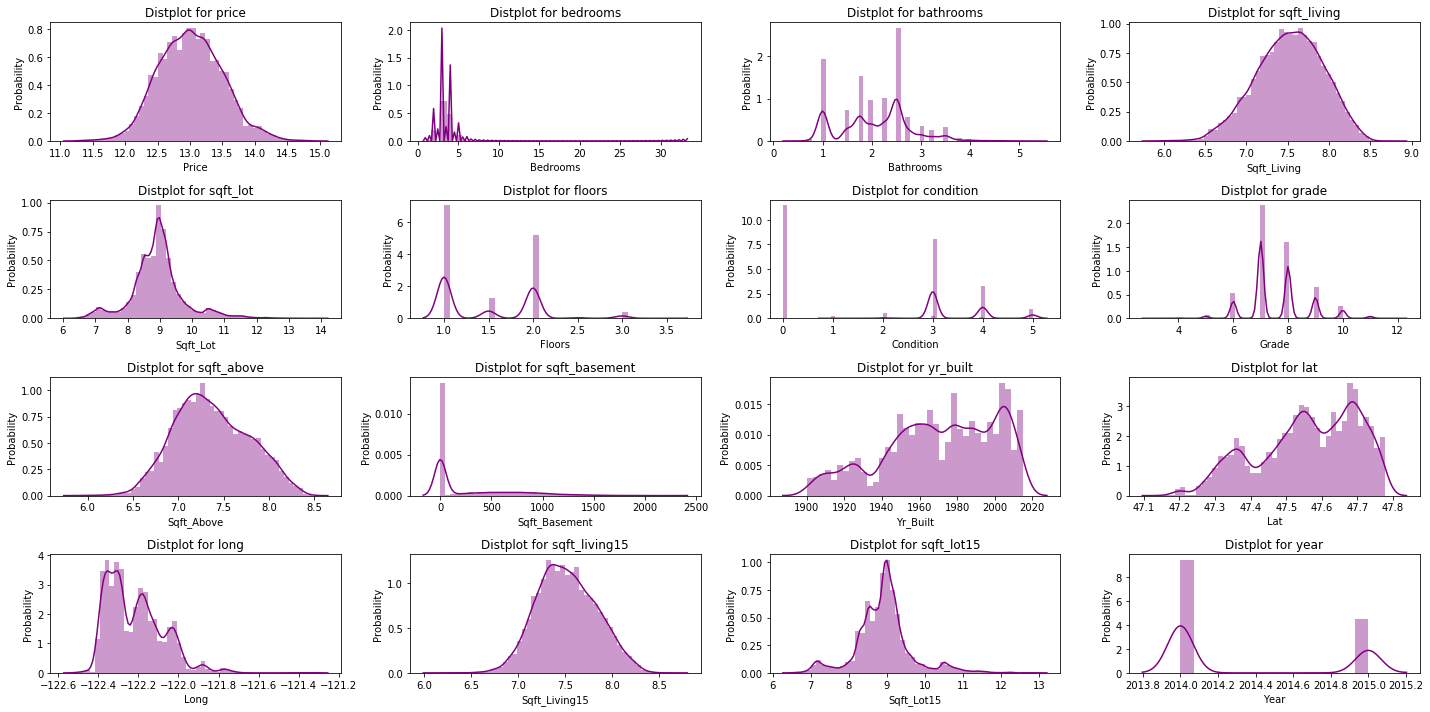

In [19]:
# Here we drop the id column as it will not be used in our model
dfNumeric = dfPreprocessed.select_dtypes(['int64','float64']).drop(labels = 'id', axis = 1).copy()

# We have identified the columns that will benefit from log transformation under the hood. Running this code block
# without the transformation will show as much. 
locColumns = ['price', 'sqft_living', 'sqft_living15', 'sqft_above', 'sqft_lot', 'sqft_lot15']
dfNumeric[locColumns] = dfNumeric[locColumns].applymap(lambda x: np.log(x))

# we now plot the distribution for each column and display a dataframe with the pvalues from a rigorous normal test
plt.figure(figsize=(20,10))
plotNum = 1
pvalueDict = {}
for x in dfNumeric.columns:
    try:
        axes = plt.subplot(4, 4, plotNum)
        sns.distplot(a = dfNumeric[x], ax = axes, norm_hist = True, color = 'purple')
        plotNum += 1
        plt.title(f'Distplot for {x}')
        plt.xlabel(f'{x.title()}')
        plt.ylabel(f'Probability')
        pvalueDict[x] = stats.normaltest(dfNumeric[x])[1]
    except:
        print(f'''
                  Column, {x}, did not yield a visual because
                  the vast majority of the entries are 0.
                  The seaborn.distplot method of plotting is
                  protected against outliers and hense does not 
                  detect out the non-zero data. However, for the
                  remainder of the analysis we want to keep this info,
                  thus we skip the visual but note that analysis
                  will contine without error
              ''')
        
# create the pvalues df from the various normal test preformed
dfTemp = pd.DataFrame(pvalueDict.values(), index = pvalueDict.keys())
dfTemp.columns = ['P-Values for Normality Test']
display(dfTemp)
plt.tight_layout()

Alas, according to a rigorous test for normality, all numerical columns fail. While normal data would be beneficial, what we really need are for residuals to be normal.

#### Normality Of Residuals
This will be explored after the model has been created.

#### Heteroskewdacity
This will be explored after the model has been created. 

## Standardizing Numerical Data

In order for all our independent variable to be clearly represented in the analysis they must be normalized. For the model we will use z-score standardization. Note that we can only standardize out numerical data.

In [20]:
dfNumericLog = dfNumeric.copy()

In [21]:
for x in dfNumeric.columns:
    mean = dfNumeric[x].mean()
    std = dfNumeric[x].std()
    dfNumeric[x] = dfNumeric[x].apply(lambda x: (x - mean)/std)
dfNumeric.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year
count,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04
mean,6.971231e-14,1.412979e-15,6.380463e-15,1.645558e-13,-3.172752e-14,-3.251074e-14,-1.325464e-15,-1.422448e-15,1.128647e-14,2.413107e-13,4.649863e-15,1.114680e-15,1.451505e-13,-4.543766e-12,3.114173e-13,-6.882110e-14,1.597002e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.591133e+00,-2.589216e+00,-2.197559e+00,-4.015288e+00,-3.282271e+00,-8.994903e-01,-2.795061e-01,-3.709854e+00,-4.246013e+00,-3.579447e+00,-6.587022e-01,-2.401115e+00,-2.915730e+00,-2.125388e+00,-4.428113e+00,-3.313938e+00,-6.923175e-01
25%,-7.008130e-01,-3.825593e-01,-7.990542e-01,-6.817101e-01,-5.046420e-01,-8.994903e-01,-2.795061e-01,-6.339914e-01,-5.396735e-01,-7.311662e-01,-6.587022e-01,-6.658999e-01,-6.488925e-01,-8.137387e-01,-7.079482e-01,-5.201818e-01,-6.923175e-01
50%,-2.184506e-02,-3.825593e-01,2.498241e-01,3.512387e-02,-7.050110e-03,-8.994903e-01,-2.795061e-01,-6.339914e-01,-5.396735e-01,-7.723649e-02,-6.587022e-01,1.166480e-01,8.076384e-02,-1.362933e-01,-4.961475e-02,2.605157e-02,-6.923175e-01
75%,6.812953e-01,7.207692e-01,5.994502e-01,7.253078e-01,3.737832e-01,9.571796e-01,-2.795061e-01,9.039399e-01,3.869113e-01,7.308148e-01,6.120576e-01,8.651720e-01,8.565645e-01,6.348414e-01,7.093707e-01,3.905965e-01,1.444355e+00
max,3.901699e+00,3.271729e+01,4.445337e+00,3.087592e+00,6.184724e+00,3.742184e+00,5.728397e+00,2.441871e+00,4.093251e+00,2.704468e+00,4.839778e+00,1.511624e+00,1.566754e+00,6.501231e+00,3.634656e+00,5.564219e+00,1.444355e+00


## Encoding Categorical Data

Moving on, we need to encode our categorical data. The approach we will be using in one-hot encoding.

In [22]:
dfcatCols = dfPreprocessed.select_dtypes('category').copy()
encodedCatCols = pd.get_dummies(dfcatCols, drop_first = True)

## The Final Dateframe

In [23]:
#combine the numerical data and one-hot encoded data for the final dataframe. 
dfFinal = pd.concat([dfNumeric,encodedCatCols], axis = 1)
dfFinal.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year,waterfront_1.0,waterfront_Null,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,2.082300e+04,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000
mean,6.971231e-14,1.412979e-15,6.380463e-15,1.645558e-13,-3.172752e-14,-3.251074e-14,-1.325464e-15,-1.422448e-15,1.128647e-14,2.413107e-13,4.649863e-15,1.114680e-15,1.451505e-13,-4.543766e-12,3.114173e-13,-6.882110e-14,1.597002e-13,0.003410,0.109927,0.009557,0.013255,0.012438,0.007588,0.020842,0.006771,0.013207,0.004178,0.009269,0.004898,0.008308,0.009461,0.023820,0.002929,0.018633,0.013447,0.015079,0.012246,0.013062,0.005955,0.019930,0.025693,0.027085,0.001489,0.011526,0.025933,0.009221,0.027374,0.017769,0.012870,0.019402,0.021515,0.021899,0.014071,0.004610,0.012822,0.020122,0.016184,0.008596,0.015416,0.004754,0.028862,0.010469,0.016040,0.012630,0.008932,0.005091,0.012102,0.027854,0.015368,0.026413,0.024108,0.008404,0.013687,0.019402,0.017000,0.023676,0.012438,0.015944,0.013783,0.002737,0.021130,0.011910,0.012870,0.011622,0.012486,0.006531,0.013399,0.014647,0.189550,0.013351,0.010805,0.185276,0.218268,0.212649,0.058301,0.087307,0.103779,0.110551,0.101090,0.102291,0.089805,0.082409,0.086635,0.064928,0.067858
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.058294,0.312806,0.097293,0.114366,0.110833,0.086779,0.142860,0.08201

## Treating Multi-Coolinearity

With our final representation of both numerical and categorical columns.  we now will go through the process of removing coolinear columns. For the purposese of this investigation we will use a correlation value of .75 as the threshold of what columns we should remove for being coolinear. 

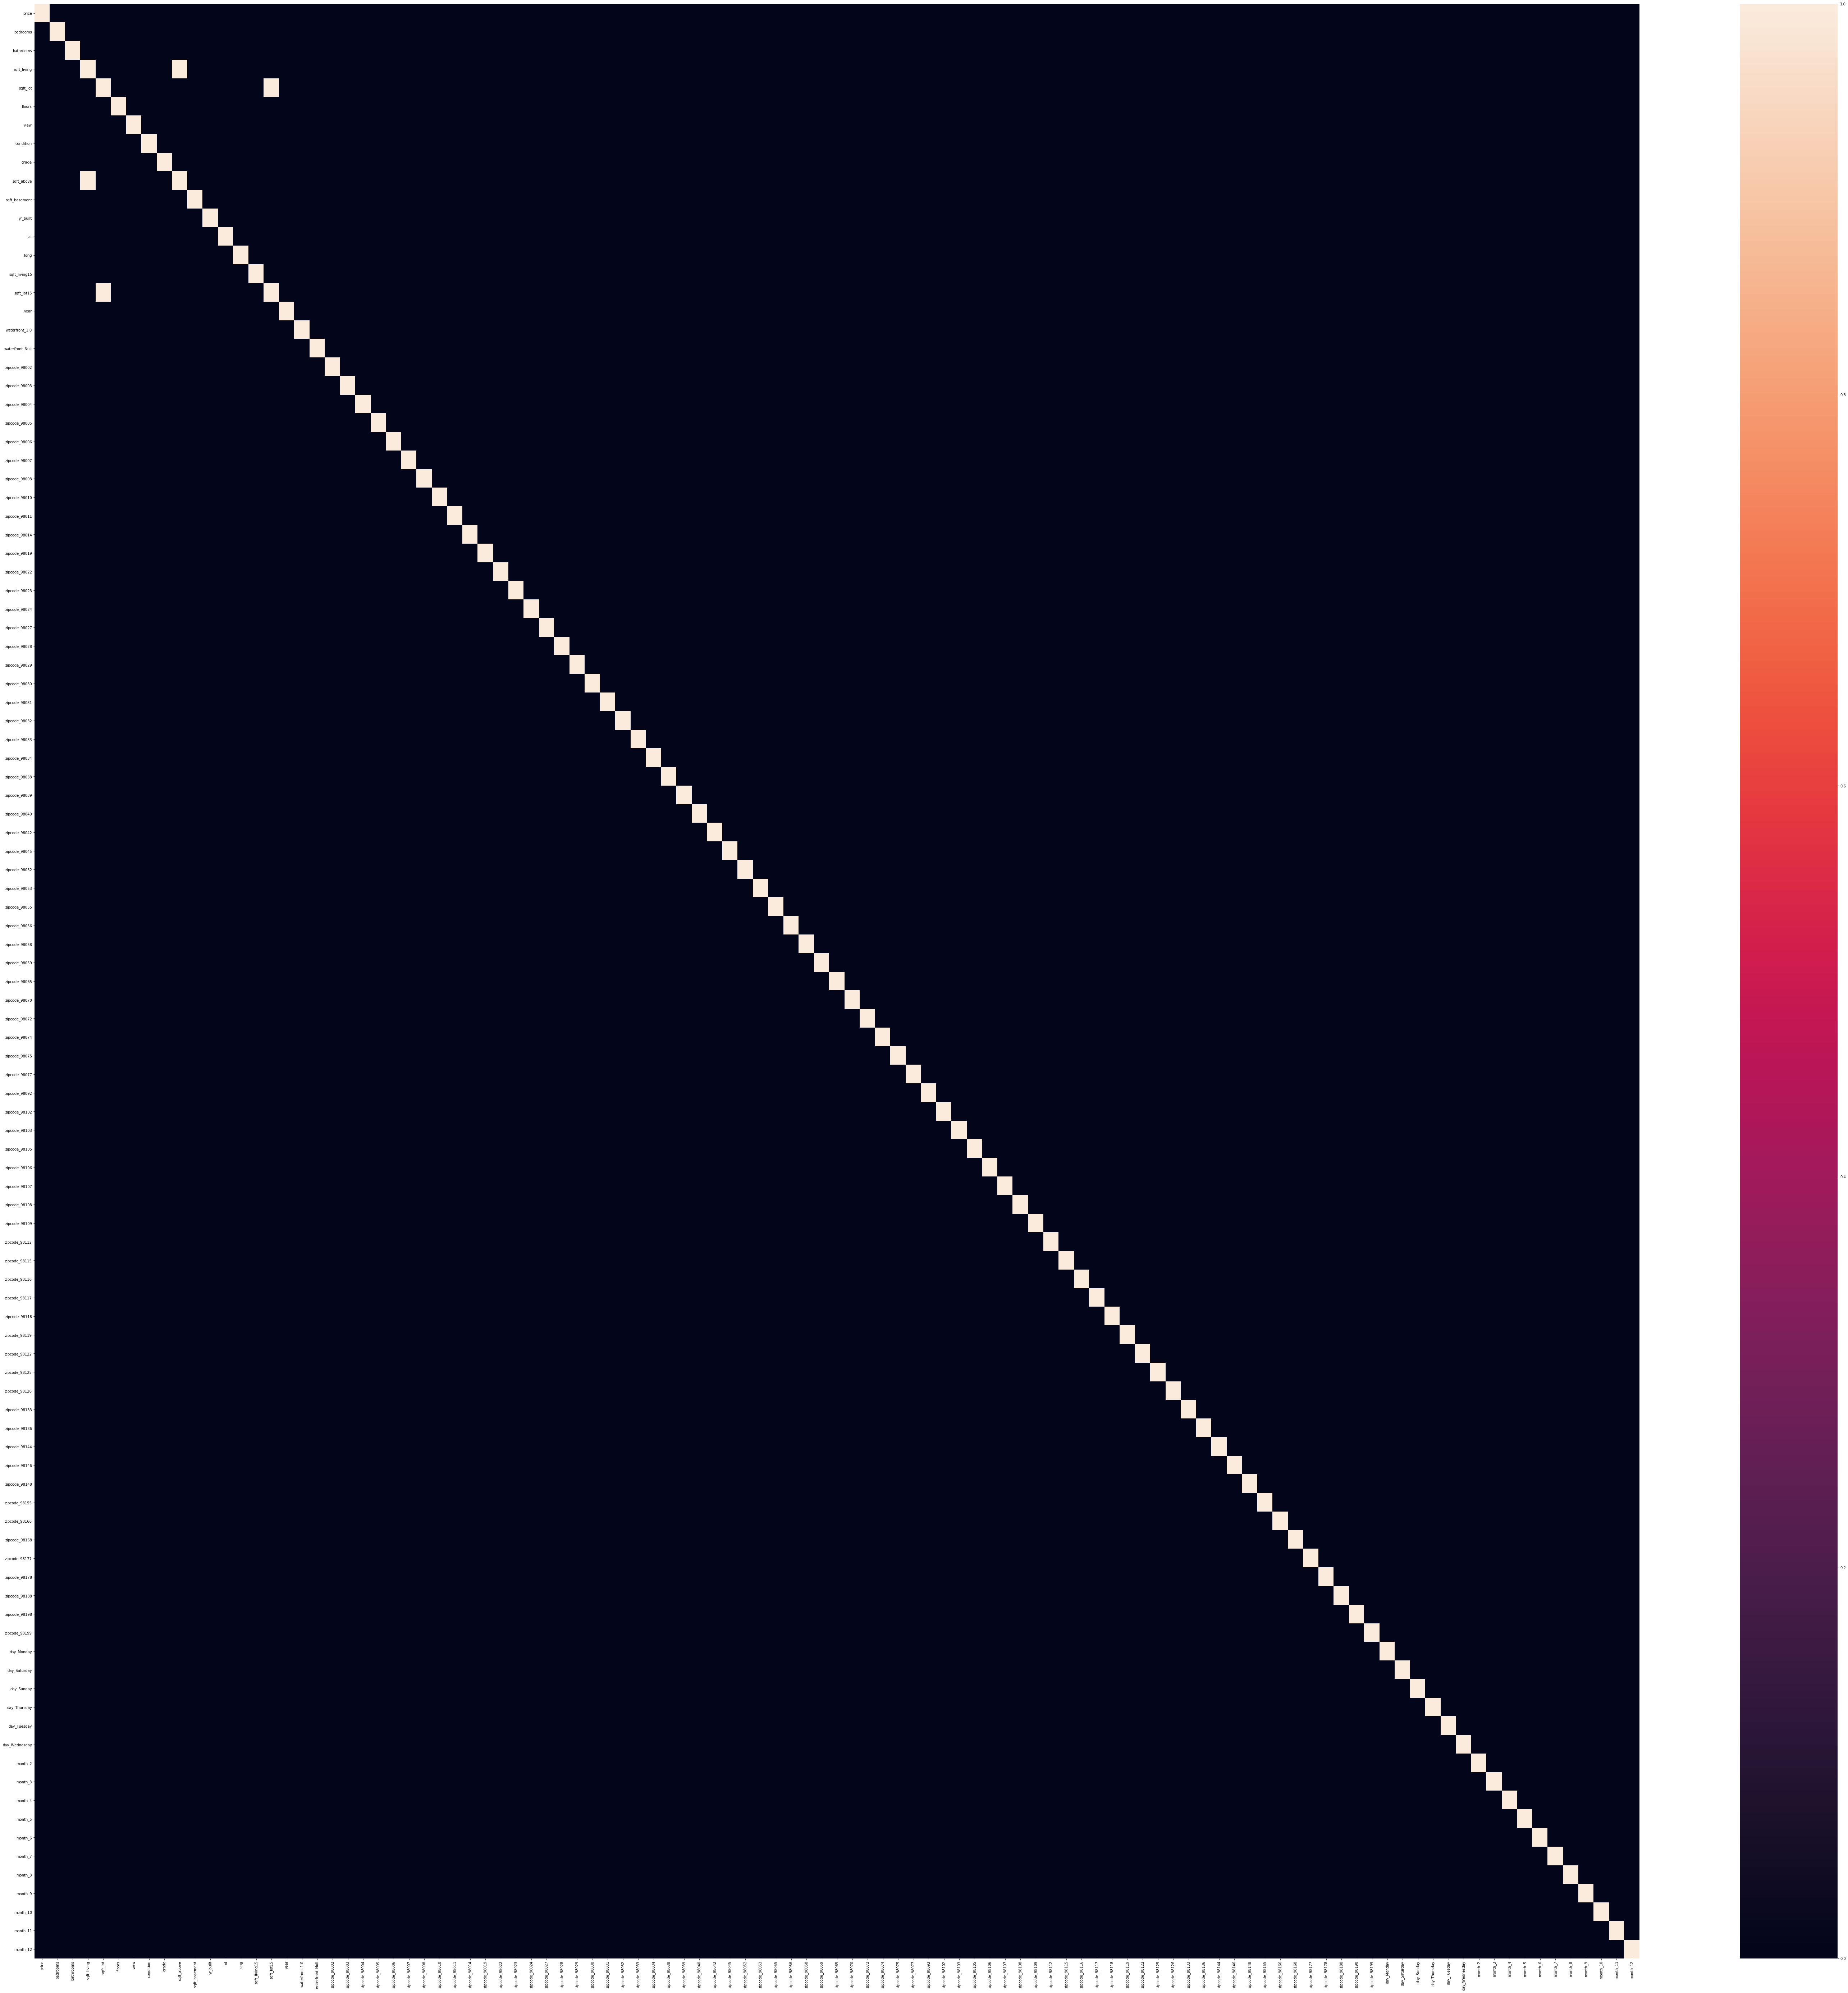

In [24]:
# Create a true false table based on the dfFinal correlation matrix output
colinearCorrelations = np.abs(dfFinal.corr())>.75

# Instantiate a figure and create a heatmap of the correlations matrix
plt.figure(figsize=(100,100))
sns.heatmap(colinearCorrelations.iloc[:, 0:]);

This representaion isn't remotely useful for presentation but it does show that we are only concerned with the columns in top left corner. 

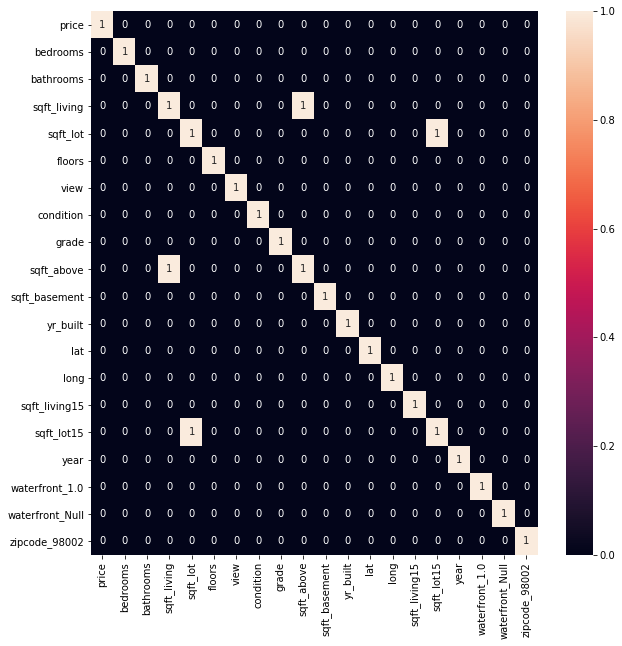

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(colinearCorrelations.iloc[:20, :20], annot = True)

We're detected a co-linear relationship between the following pairs:
* sqft_lot15 : sqft_lot
* sqft_living : sqft_above

we will drop one column from each pair to reduce the incluence of nulti-colinearity on our model.

In [26]:
dfFinal.drop(labels = ['sqft_above', 'sqft_lot15'], axis = 1, inplace = True)

## Creating The Model

With all the data preped we move forward with creating out baseline model.

In [27]:
# The following code creates a linear model using ordinary least squares. for more info see statsmodels.OLS
Y = dfFinal['price']
X = dfFinal.drop(labels = ['price'], axis = 1)
X = sm.add_constant(X)
model = sm.OLS(endog = Y, exog = X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1373.
Date:                Sun, 23 Aug 2020   Prob (F-statistic):               0.00
Time:                        06:23:32   Log-Likelihood:                -8215.4
No. Observations:               20823   AIC:                         1.664e+04
Df Residuals:                   20720   BIC:                         1.745e+04
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9491      0.046    -20.834      0.000      -1.038      -0.860
bedrooms           -0.0228      0.003     -6.866      0.000      -0.029      -0.016
bathrooms           0.0640      0.004     14.492      0.000       0.055       0.073
sqft_living         0.3494      0.006     57.106      0.000       0.337       0.361
sqft_lot            0.0952      0.004     24.687      0.000       0.088       0.103
floors             -0.0100      0.004     -2.450      0.014      -0.018      -0.002
view                0.0840      0.003     29.176      0.000       0.078       0.090
condition           0.0666      0.003     23.640      0.000       0.061       0.072
grade               0.2057      0.004     46.067      0.000       0.197       0.214
sqft_basement      -0.0617      0.004    -17.201      0.000      -0.069      -0.055
yr_built           -0.0298      0.004     -6.964      0.000      -0.038      -0.021
lat                 0.1392      0.020      6.820      0.000       0.099       0.179
long               -0.1183      0.015     -7.988      0.000      -0.147      -0.089
sqft_living15       0.0957      0.004     22.252      0.000       0.087       0.104
year                0.0975      0.008     12.253      0.000       0.082       0.113
waterfront_1.0      0.9071      0.046     19.675      0.000       0.817       0.997
waterfront_Null    -0.0050      0.008     -0.630      0.529      -0.021       0.011
zipcode_98002       0.0472      0.033      1.448      0.148      -0.017       0.111
zipcode_98003      -0.0049      0.029     -0.170      0.865      -0.062       0.052
zipcode_98004       2.0392      0.055     37.291      0.000       1.932       2.146
zipcode_98005       1.2920      0.058     22.297      0.000       1.178       1.406
zipcode_98006       1.1816      0.048     24.789      0.000       1.088       1.275
zipcode_98007       1.1438      0.059     19.240      0.000       1.027       1.260
zipcode_98008       1.1633      0.057     20.455      0.000       1.052       1.275
zipcode_98010       0.7174      0.052     13.870      0.000       0.616       0.819
zipcode_98011       0.5376      0.074      7.270      0.000       0.393       0.683
zipcode_98014       0.6202      0.084      7.408      0.000       0.456       0.784
zipcode_98019       0.4843      0.081      6.014      0.000       0.326       0.642
zipcode_98022       0.3996      0.045      8.811      0.000       0.311       0.488
zipcode_98023      -0.1294      0.027     -4.814      0.000      -0.182      -0.077
zipcode_98024       0.8960      0.075     12.019      0.000       0.750       1.042
zipcode_98027       1.0480      0.049     21.508      0.000       0.952       1.143
zipcode_98028       0.4263      0.072      5.933      0.000       0.285       0.567
zipcode_98029       1.2302      0.056     22.067      0.000

### we will now preform a QQ-plot and heterskewdacity test


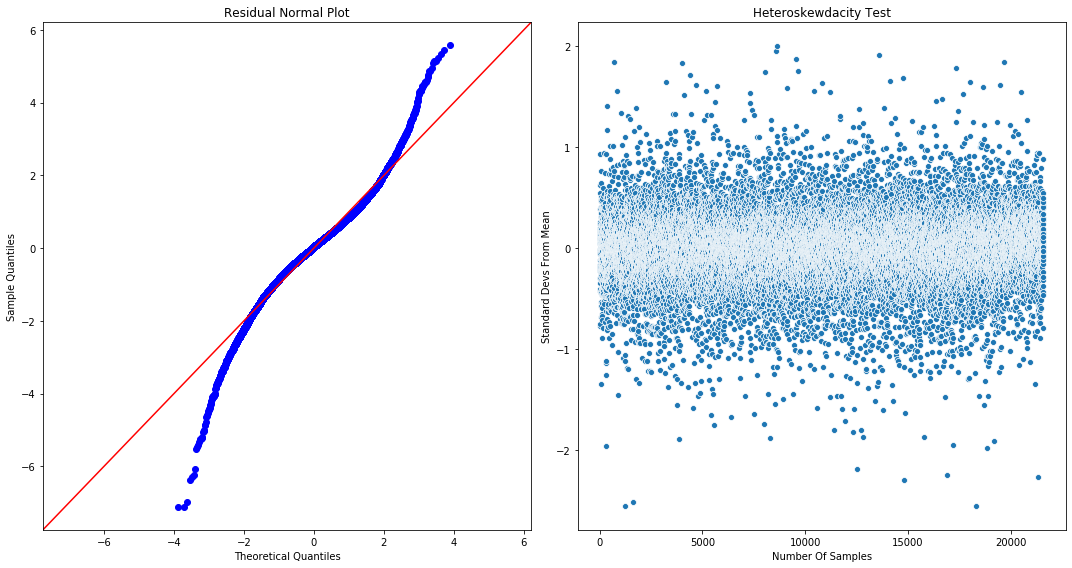

In [28]:
# get the residual data from the model object
residuals = model.resid

# Instantiate a figure and axes objects
plt.figure(figsize=(15,8))
axes1 = plt.subplot(1,2,1)
axes2 = plt.subplot(1,2,2)

#Cretae the plots
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax = axes1)
sns.scatterplot(data = residuals, ax = axes2)

# Customize the figure
axes1.set_title("Residual Normal Plot")
axes2.set_title("Heteroskewdacity Test")
axes2.set_xlabel('Number Of Samples')
axes2.set_ylabel('Standard Devs From Mean')

#plotting options
plt.tight_layout()
plt.show()

## Base Model Conclusions

As far as base models go, this was a great first attempt. From the R-squared it appears we've been able to capture most of the King County Housing data set's variation.

A note the QQ-plot and heteroskewdacity test. The residuals are clearly homoskewdastic as shown in the plot on the right, thus satisfying that portion of our modeling assumptions. The QQ-plot is less clear just from the graph. Reading the plot on the left we can conclude that the residuals are too steep for a standard normal distribution. This means that more of the residuals lie in the center of the distribution (or the tails are thinner) than would be expected in a standard normal. In a sense, the residuals are displaying less varience than a typical normal. With this finding, we can feel confident about the model's conclusions because the residuals are more centrally clustered than a typical normal, meaning our confidence in each of the predicted coefficients should be higher than that predicted by our model.

# Improving The Baseline Model

Taking a close look at our baseline there are several points to pay attention to. In general it seems as though our approach of leaving all available information in the model has paid off rather significantly, no pun intended. Yet, there are still a number of the independant variables or features of the model that have failed to meet our p-value threshold. We will now go through and eliminate these features.

## Feature Analysis

Our selection process has brought us this far. The following function is taken from the customModule in this repo. It will loop through all the features in the model and remove the ones which don't meet the p-value standard we set (.05 in this case). After removing the insignificant p-values, the function reruns the model and once again checks whether or not the new list of features passes the p-value threshold. This will continue until all the remaining features pass the test.

In [29]:
# for more info on reduceModel, see the docstring or source code in this repo
finalModel, excludedCols = customModule.reduceModel(dfFinal, 
                                                    features = [x for x in dfFinal.drop(columns = 'price').columns], 
                                                    target = 'price', 
                                                    pThreshold = .05)

 The starting R-value for the model is 0.8711054845918104


The following columns have p-values above the threshold of 0.05: ['waterfront_Null', 'zipcode_98002', 'zipcode_98003', 'zipcode_98168', 'zipcode_98188', 'zipcode_98198', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday']



## Improved Model Summary

In [30]:
finalModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1556.
Date:                Sun, 23 Aug 2020   Prob (F-statistic):               0.00
Time:                        06:23:33   Log-Likelihood:                -8221.9
No. Observations:               20823   AIC:                         1.663e+04
Df Residuals:                   20732   BIC:                         1.735e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9395      0.028    -33.221      0.000      -0.995      -0.884
bedrooms          -0.0227      0.003     -6.820      0.000      -0.029      -0.016
bathrooms          0.0642      0.004     14.545      0.000       0.056       0.073
sqft_living        0.3495      0.006     57.161      0.000       0.338       0.362
sqft_lot           0.0946      0.004     24.640      0.000       0.087       0.102
floors            -0.0102      0.004     -2.515      0.012      -0.018      -0.002
view               0.0842      0.003     29.310      0.000       0.079       0.090
condition          0.0669      0.003     23.780      0.000       0.061       0.072
grade              0.2057      0.004     46.117      0.000       0.197       0.214
sqft_basement     -0.0618      0.004    -17.263      0.000      -0.069      -0.055
yr_built          -0.0298      0.004     -6.995      0.000      -0.038      -0.021
lat                0.1386      0.014     10.078      0.000       0.112       0.166
long              -0.1114      0.014     -7.955      0.000      -0.139      -0.084
sqft_living15      0.0955      0.004     22.239      0.000       0.087       0.104
year               0.0977      0.008     12.293      0.000       0.082       0.113
waterfront_1.0     0.9097      0.046     19.756      0.000       0.819       1.000
zipcode_98004      2.0224      0.037     55.199      0.000       1.951       2.094
zipcode_98005      1.2734      0.042     30.435      0.000       1.191       1.355
zipcode_98006      1.1616      0.032     35.777      0.000       1.098       1.225
zipcode_98007      1.1234      0.044     25.604      0.000       1.037       1.209
zipcode_98008      1.1418      0.040     28.592      0.000       1.063       1.220
zipcode_98010      0.6888      0.049     14.192      0.000       0.594       0.784
zipcode_98011      0.5208      0.049     10.577      0.000       0.424       0.617
zipcode_98014      0.5853      0.069      8.458      0.000       0.450       0.721
zipcode_98019      0.4564      0.061      7.522      0.000       0.337       0.575
zipcode_98022      0.3707      0.041      8.972      0.000       0.290       0.452
zipcode_98023     -0.1397      0.022     -6.495      0.000      -0.182      -0.098
zipcode_98024      0.8646      0.066     13.191      0.000       0.736       0.993
zipcode_98027      1.0235      0.037     27.486      0.000       0.951       1.097
zipcode_98028      0.4120      0.046      9.011      0.000       0.322       0.502
zipcode_98029      1.2033      0.043     27.774      0.000       1.118       1.288
zipcode_98030      0.0884      0.026      3.363      0.001       0.037       0.140
zipcode_98031      0.0966      0.026      3.688      0.000       0.045       0.148
zipcode_98032     -0.1148      0.034     -3.408      0.001      -0.181      -0.049
zipcode_9803

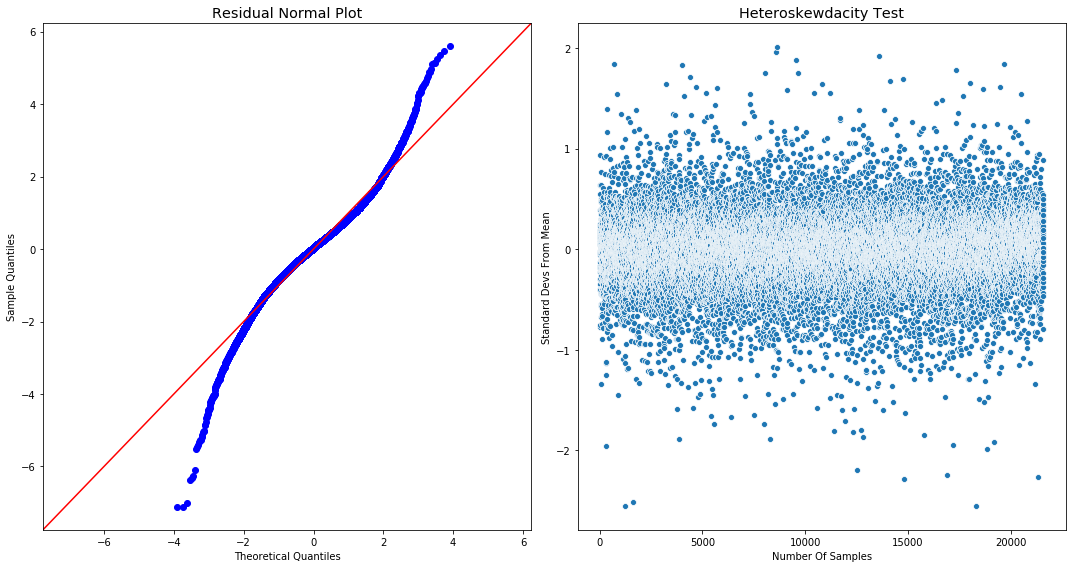

In [31]:
# Pull the rediduals for the model from the finalModel object
residuals = finalModel.resid

# Initialize a figure
plt.figure(figsize=(15,8))
axes1 = plt.subplot(1,2,1)
axes2 = plt.subplot(1,2,2)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax = axes1)
sns.scatterplot(data = residuals, ax = axes2)

# Plot formatting
plt.style.use('ggplot')
axes1.set_title("Residual Normal Plot")
axes2.set_title("Heteroskewdacity Test")
axes2.set_xlabel('Number Of Samples')
axes2.set_ylabel('Standard Devs From Mean')
plt.tight_layout()
plt.show()

Because we didn't remove any rows from the dataset, the QQ-plot is identical to the above version. Ultimately, improving upon the normality of the residuals can be adjusted by dropping more data from the set in the preprocessing section. We will conclude that the residuals are sufficiently normal and most definately homoskewdastic. We can move forward with answering the original questions with confidence in our model's conclusions. 

If you would like to see all the columns that were removed by the reduceModel funtion then uncomment the following cell

In [32]:
# excludedCols.sort()
# display(excludedCols)

In [33]:
sigFeatures = finalModel.params.index[1:]
sigFeaturesFinal = [x for x in sigFeatures]

There are some interesting revelations that come out of the unscaled model that we will comment on in the conclusions secion.

## Cross Validating The Model
As a final exercise to test the validity of our model, we will preform a 20 fold cross validation in order to test our models ability to predict the data in each fold, given that it's been trained on the remainder. 

In [34]:
# Because scikit-learn has way better cross-validation build ins we use theirs

# Use the linearRegression class to preform the regression all features determined to be significant. 
linreg = LinearRegression()
cv_20_results = cross_val_score(linreg, dfFinal[sigFeaturesFinal], dfFinal['price'], cv=20, scoring='r2')
display(cv_20_results)
print(f'The median of the cross validation was {np.median(cv_20_results)}')

array([0.88249284, 0.86261438, 0.86960893, 0.87035279, 0.85999201,
       0.86785112, 0.88166402, 0.84859183, 0.85898835, 0.87804441,
       0.87869826, 0.86338673, 0.87081199, 0.87442952, 0.86865441,
       0.87787841, 0.85309918, 0.87760999, 0.86215041, 0.86059339])

The median of the cross validation was 0.8691316663366389


Our cross validation has confirmed the stbility of our model accross various subsets, increasing our confidence in it's ability to accurately reflect the data. 

# Conclusions

## Overview

In general, every feature that remains in the model should be considered significant (the actual statistics definition) predictors of saleprice. That being said, being statistically significant and being one of the most impactful features is not the same. We graph their relationships against each other as follows.

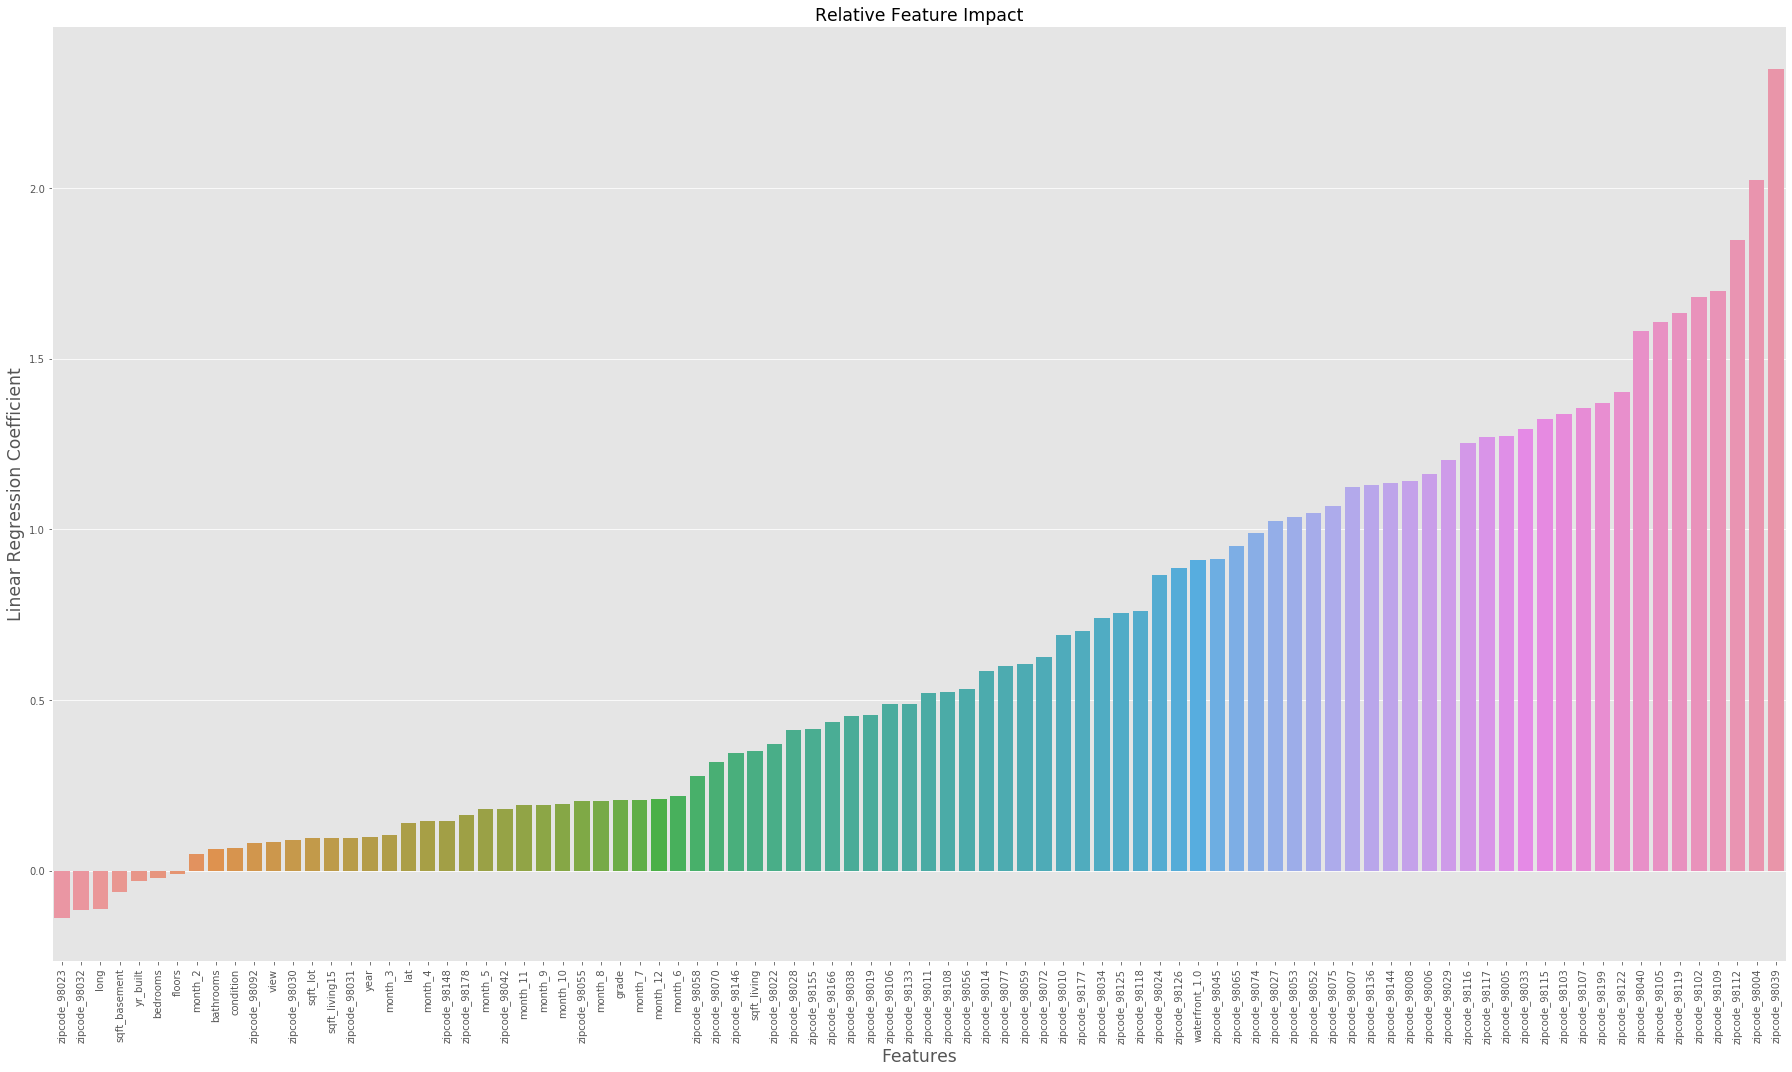

In [35]:
#Pre-sort the values for the visual
dfplot = finalModel.params[1:].sort_values(axis = 0, ascending = True).copy().reset_index()
dfplot.columns = ['Features', 'Coefficient Values']

# Initialize a figure
plt.figure(figsize=(25,15))
sns.barplot(x = 'Features', y = 'Coefficient Values', data = dfplot)

# Plot formatting
plt.title("Relative Feature Impact",size = 'xx-large')
plt.xlabel('Features', size = 'xx-large')
plt.ylabel('Linear Regression Coefficient', size = 'xx-large')
plt.xticks(rotation = 90);
plt.tight_layout()
plt.show()


From the visual I think it's fair to conclude there is something to the old addage, location, location, location. We can see the incredible power of a homes zipcode in the following visual. 

### Top Three Features
* 1. Zipcode
* 2. Waterfront Property
* 3. Living Area Square Footage

## Question Answers

###  Question 1: What is the one thing I can do to increase my house value the most?
#### Answer:
If the end goal is to increase your homes price then the best option is to increase the square footage. In the bar graph above, square footage is the only feature that can readily be changed (short of picking the house up and moving it or building a lake). 


###  Question 2: If I have space to add an additional room, what should I put in the space if I want to increase my home value?
#### Answer:
Bathroom without question! According to the model adding a bedroom has a slightly <strong>negative</strong> impact on a homes sale price. Bathrooms on the other hand have a slightly <strong>positive</strong> impact on home price. The following visual explains more clearly.

Text(0.5, 1.0, 'Home Sale Price Vs Number Of Rooms')

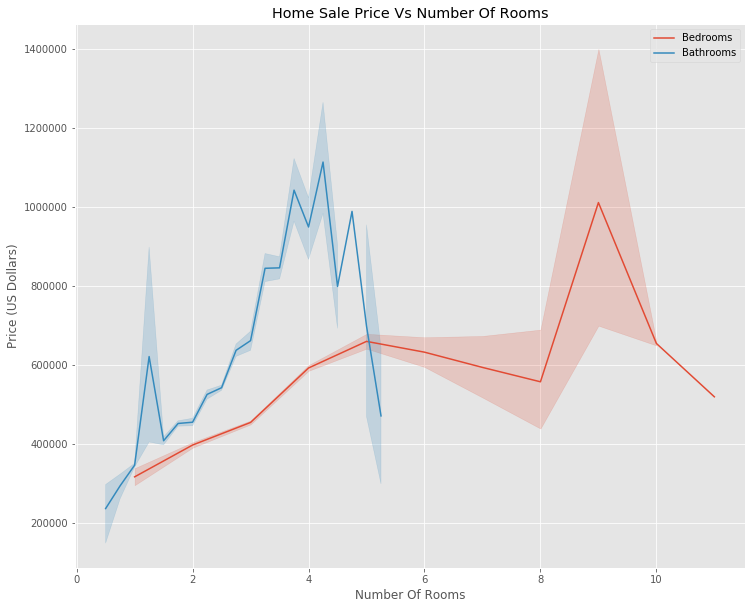

In [36]:
# Create a copy of the preprocesses data
dfTemp = dfPreprocessed.copy()

# Initialize a Figure
plt.figure(figsize=(12,10))

axes2 = sns.lineplot(x = 'bedrooms', y = 'price', data = dfTemp.loc[dfTemp['bedrooms'] < 15], palette = 'Blues')
axes1 = sns.lineplot(x = 'bathrooms', y = 'price', data = dfTemp.loc[dfTemp['bedrooms'] < 15], palette = 'Reds')

# Plot formatting
axes1.legend(['Bedrooms', 'Bathrooms'])
plt.xlabel('Number Of Rooms')
plt.ylabel('Price (US Dollars)')
plt.title('Home Sale Price Vs Number Of Rooms')


###  Question 3: I'm looking to buy a house in King County. I like a lot of space and don't really care about the neighborhood. What area should I look in to get the most space for my money if I can only spend 400,000 dollars.
#### Answer:
Look in the one of the following areas zipcodes: 98032, 98023, 98030, 98030, 98092, 98148, 98178
##### Answer Explanation:
The model hands us the answer. Becuase all entries are standardized, the magitude of the coefficients say which zip codes have the least impact on home price. To demonstrate the effectiveness, below is a plot of all the homes under 400,000 brocken out by zip code. 

In [37]:
#Simplify the following cell
# dfPreprocessed['zipcode'].isin([])

Text(0, 0.5, 'Price (US Dollars)')

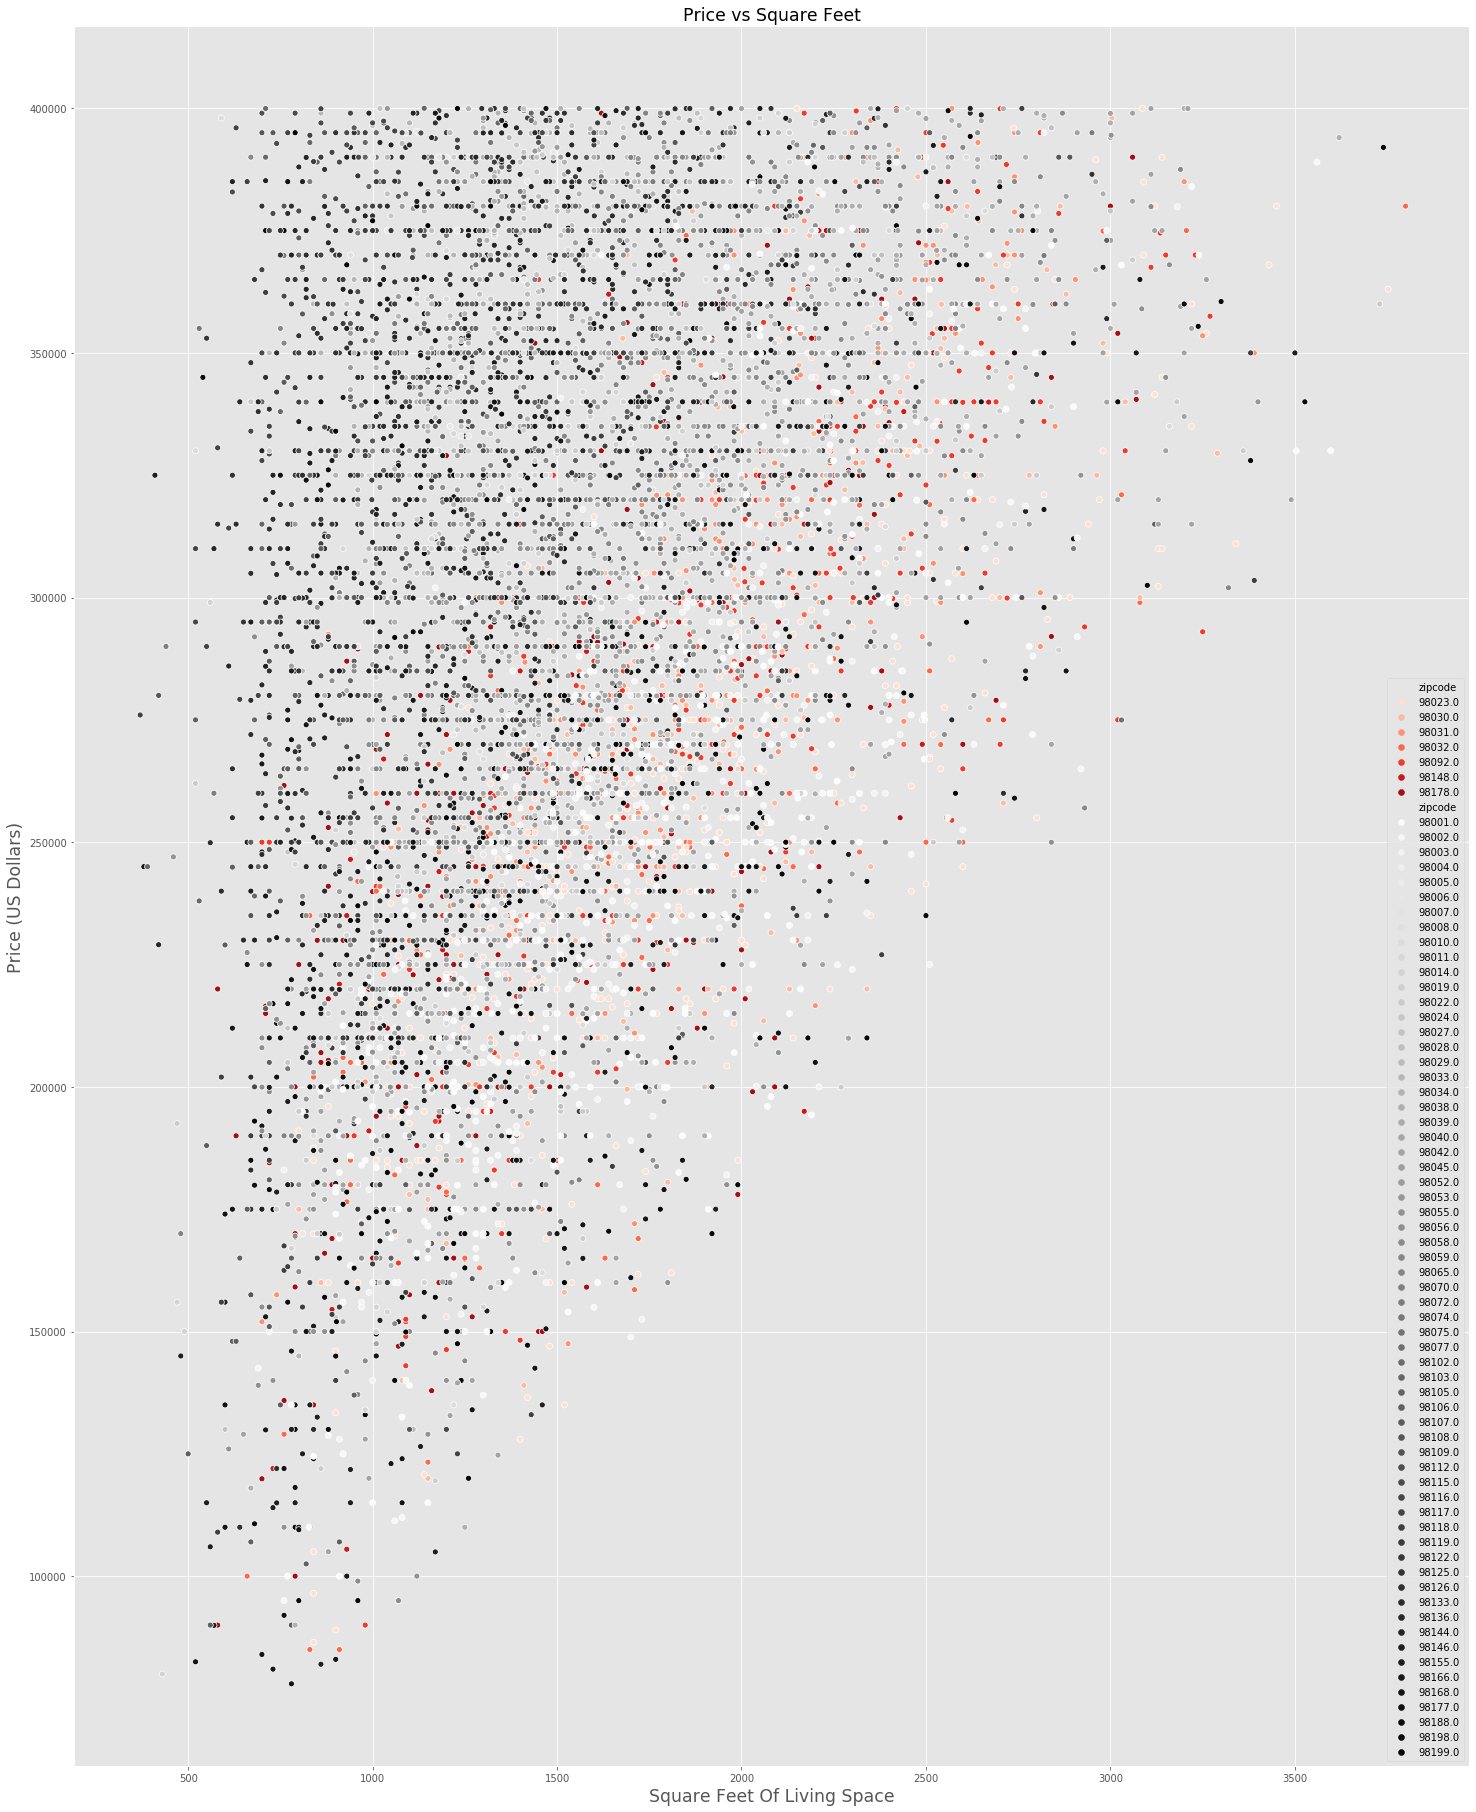

In [38]:
# Initialize a figure
plt.figure(figsize=(25,32))
sns.scatterplot(x = dfPreprocessed['sqft_living'].loc[dfPreprocessed['price'] < 400000],
                y = dfPreprocessed['price'].loc[dfPreprocessed['price'] < 400000],
                hue = dfPreprocessed['zipcode'].loc[(dfPreprocessed['zipcode'] == 98032)| 
                                                    (dfPreprocessed['zipcode'] == 98023) |
                                                    (dfPreprocessed['zipcode'] == 98030) |
                                                    (dfPreprocessed['zipcode'] == 98031) | 
                                                    (dfPreprocessed['zipcode'] == 98092) |
                                                    (dfPreprocessed['zipcode'] == 98148) |
                                                    (dfPreprocessed['zipcode'] == 98178)],
               palette = 'Reds')
sns.scatterplot(x = dfPreprocessed['sqft_living'].loc[dfPreprocessed['price'] < 400000],
                y = dfPreprocessed['price'].loc[dfPreprocessed['price'] < 400000],
                hue = dfPreprocessed['zipcode'].loc[(dfPreprocessed['zipcode'] != 98032) & 
                                                    (dfPreprocessed['zipcode'] != 98023) &
                                                    (dfPreprocessed['zipcode'] != 98030) &
                                                    (dfPreprocessed['zipcode'] != 98031) &
                                                    (dfPreprocessed['zipcode'] != 98092) &
                                                    (dfPreprocessed['zipcode'] != 98148) &
                                                    (dfPreprocessed['zipcode'] != 98178)],
               palette = 'binary')

# Plot Formatting
plt.style.use('seaborn-poster')
plt.title('Price vs Square Feet', size = 'xx-large')
plt.xlabel('Square Feet Of Living Space', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'xx-large')

The mentioned zipcodes do not account for all the large and cheap housing stock, but they are the locations with the highest density. 

### Qestion 4: I'm looking to sell my house, but I don't have much money for renovations. What should I do to squeeze a little extra money out of the sale?
#### Answer:
Sell your house in June. Highly effective and has no associated cost. 

##### Answer Explanation:
The reason for this isn't clear from an overhead look.

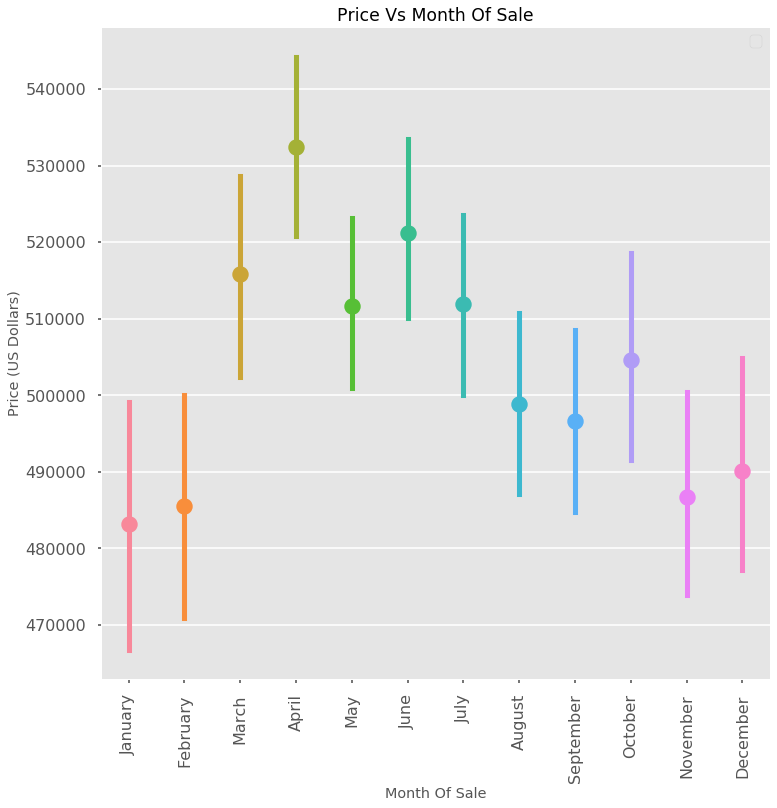

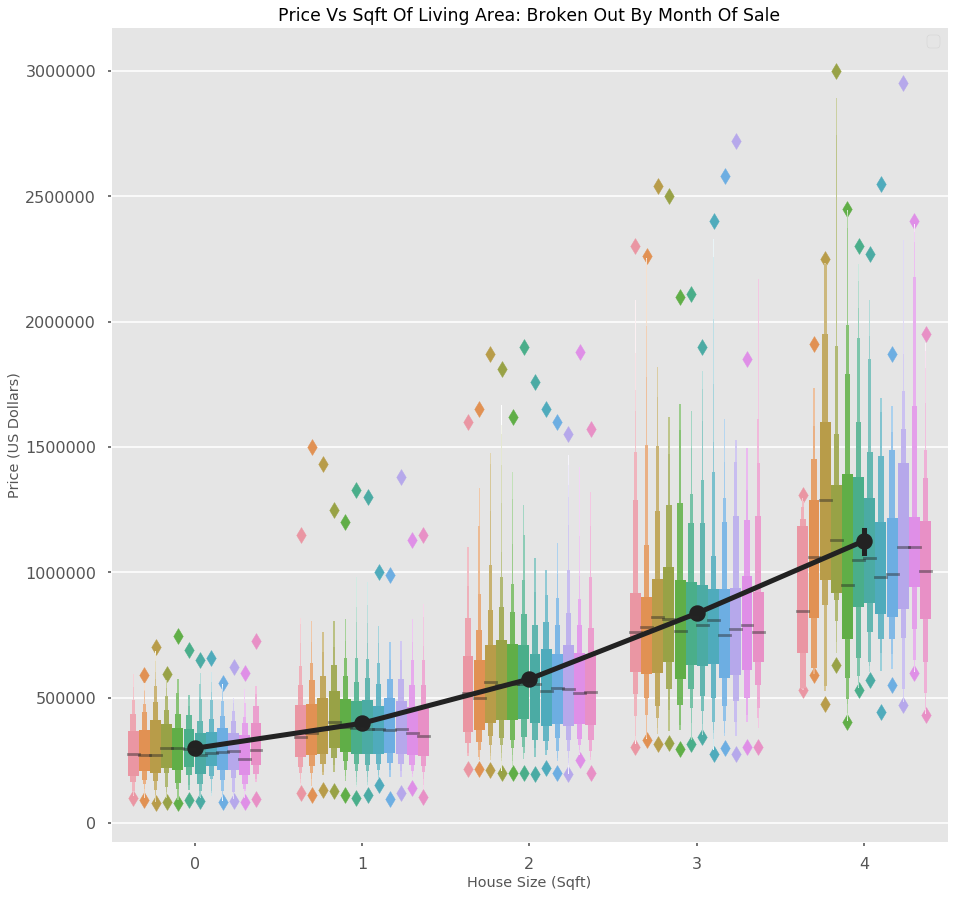

In [39]:
# copy the preprocessed data for manipulation without fear of altering the original data
dfTemp = dfPreprocessed.copy()

# Create new column grouping square footage by the thousand
dfTemp['sqft_living_1000'] = dfTemp['sqft_living'].apply(lambda x: math.floor(x/1000))
dfTemp['control'] = ['Control' for x in range(dfTemp.shape[0])]

# Initialize a figure
plt.figure(figsize=(12,12))
axes = sns.pointplot(x ='month',
                     y ='price',
                     hue = 'month',
                     data = dfTemp);
# Plot formatting adjustments
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], 
           ['January', 'February', 'March', 'April', 'May', 
            'June','July','August','September','October',
            'November','December'],
           rotation = 90)
plt.title('Price Vs Month Of Sale', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'x-large')
plt.xlabel('Month Of Sale', size = 'x-large')
plt.legend('')

# Initialize a figure
plt.figure(figsize=(15,15))
axes = sns.boxenplot(x ='sqft_living_1000',
                     y ='price',
                     hue = 'month',
                     data = dfTemp);
axes1 = sns.pointplot(x ='sqft_living_1000',
                      y ='price',hue ='control',  
                      data = dfTemp.loc[dfTemp['sqft_living_1000'] < 5], 
                      color = 'black');
# Plot formatting adjustments
plt.title('Price Vs Sqft Of Living Area: Broken Out By Month Of Sale', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'x-large')
plt.xlabel('House Size (Sqft)', size = 'x-large')
plt.legend('')


This is why you model! From the above two graphs, it isn't entirely clear as to why June is a great month to sell. It is second in the highest average sale price overall. When breaking the field out into different home sizes, June also fails to be a standout. Does this mean the model is wrong?! 

The model isn't wrong. It expresses each of the features we feed into it interms of a coefficient that engenders the majority of said feature's varience. If this is true then why is what we're seeing not what the model is saying? The reason is the least satisfying kind. It's complicated. While the above graphs use visuals to tease out the relationship between sale month and sale price, the model uses substantially more nuainced methods that take each individual data point into account. Just because we can't find a visual that verifies the assigned value of a feature's coefficient doesn't mean the model is wrong. It means the graph isn't taking into account other factors that might be working under the hood.

# Appendix

## Various Feature Visuals
### Zipcode

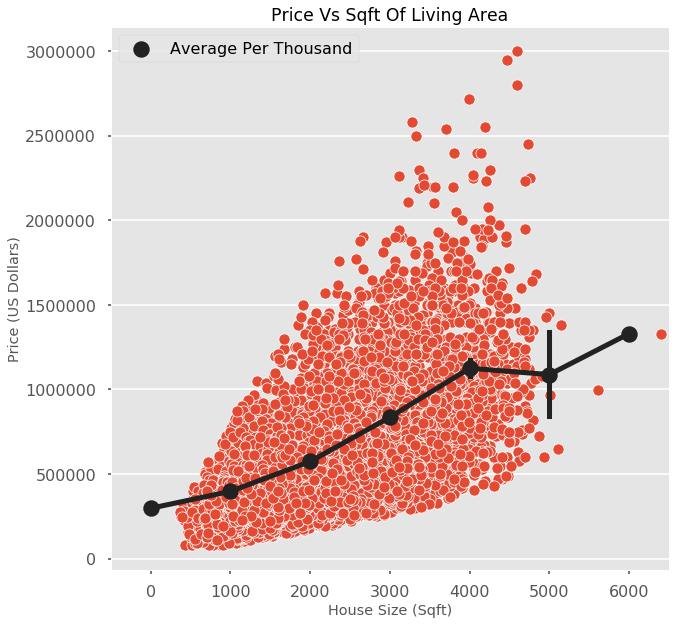

In [40]:
# copy the preprocessed data for manipulation without fear of altering the original data
dfTemp = dfPreprocessed.copy()

# Create new column grouping square footage by the thousand
dfTemp['sqft_living_1000'] = dfTemp['sqft_living'].apply(lambda x: math.floor(x/1000))
dfTemp['sqft_living_1000_detail'] = dfTemp['sqft_living'].apply(lambda x: x/1000)

# Create new column for plotting the unaltered data
dfTemp['average'] = ['Average Per Thousand' for x in range(dfTemp.shape[0])]

# Initialize a figure and plot axes
plt.figure(figsize=(10,10))
axes = sns.scatterplot(x ='sqft_living_1000_detail',
                     y ='price', 
                     data = dfTemp);
axes1 = sns.pointplot(x ='sqft_living_1000',
                      y ='price',hue ='average',  
                      data = dfTemp, 
                      color = 'black');

# Plot formatting adjustments
plt.title('Price Vs Sqft Of Living Area', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'x-large')
plt.xlabel('House Size (Sqft)', size = 'x-large')
plt.legend()
axes.set_xticklabels(['0',
                      '1000', '2000', '3000', '4000', '5000', '6000', '7000']);

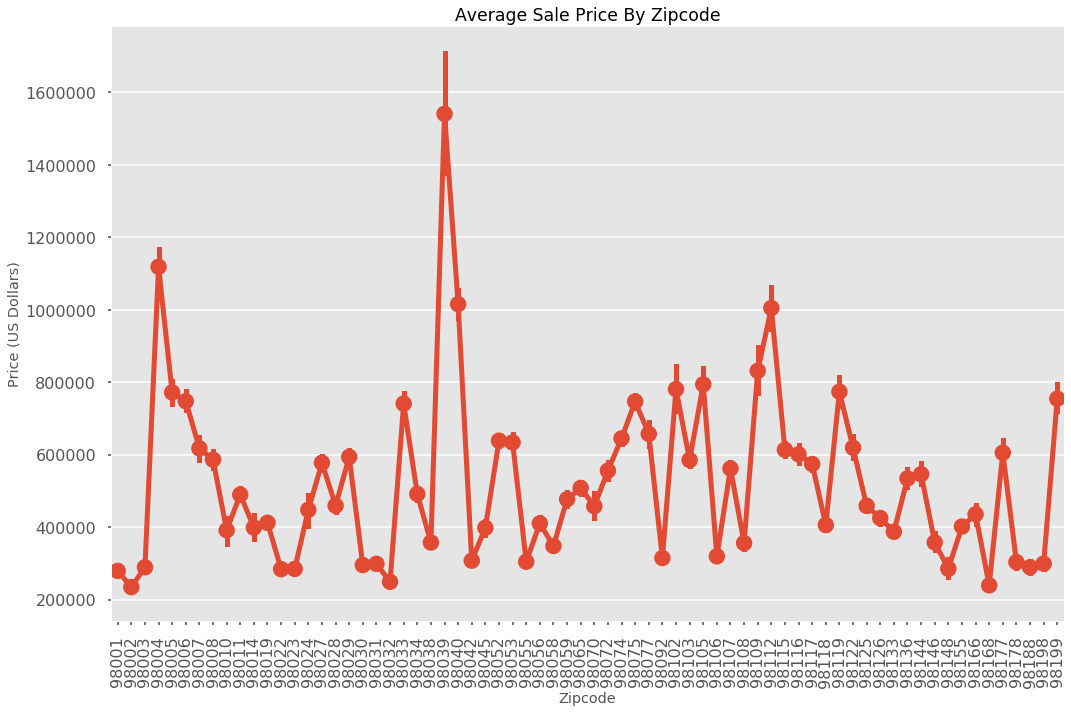

In [41]:
# Initialize a figure
plt.figure(figsize=(15,10))
axes = sns.pointplot(x = 'zipcode' , y = 'price', data = dfPreprocessed)

# Plot formatting adjustments
plt.xticks(rotation = 90);
plt.title('Average Sale Price By Zipcode', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'x-large')
plt.xlabel('Zipcode', size = 'x-large')
plt.style.use('seaborn-notebook')
plt.tight_layout()

## Number Of Views

Text(0.5, 0, 'Material Grade')

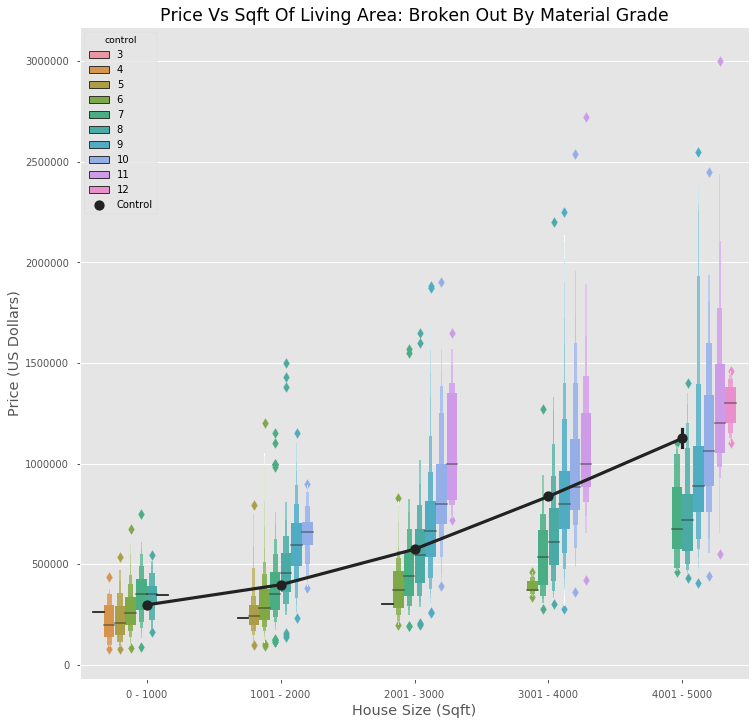

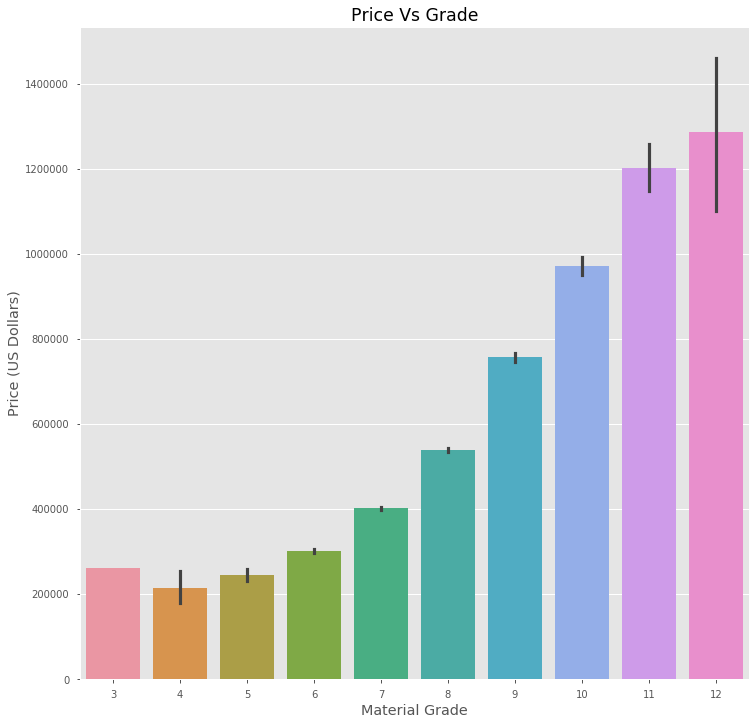

In [42]:
# copy the preprocessed data for manipulation without fear of altering the original data
dfTemp = dfPreprocessed.copy()

# Create new column for plotting the unaltered data
dfTemp['control'] = ['Control' for x in range(dfTemp.shape[0])]

# Create new column grouping square footage by the thousand
dfTemp['sqft_living_1000'] = dfTemp['sqft_living'].apply(lambda x: math.floor(x/1000))

# Initialize a figure
plt.figure(figsize=(12,12))
axes = sns.boxenplot(x ='sqft_living_1000',y ='price',hue = 'grade', data = dfTemp.loc[dfTemp['sqft_living_1000'] < 5]);
axes1 = sns.pointplot(x ='sqft_living_1000',
                      y ='price',hue ='control',  
                      data = dfTemp.loc[dfTemp['sqft_living_1000'] < 5], 
                      color = 'black');

# Plot formatting adjustments
plt.title('Price Vs Sqft Of Living Area: Broken Out By Material Grade', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'x-large')
plt.xlabel('House Size (Sqft)', size = 'x-large')
axes.set_xticklabels(['0 - 1000', '1001 - 2000', '2001 - 3000', '3001 - 4000', '4001 - 5000']);
plt.figure(figsize=(12,12))

axes1 = sns.barplot(x ='grade',
                      y ='price',  
                      data = dfTemp);
plt.title('Price Vs Grade', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'x-large')
plt.xlabel('Material Grade', size = 'x-large')

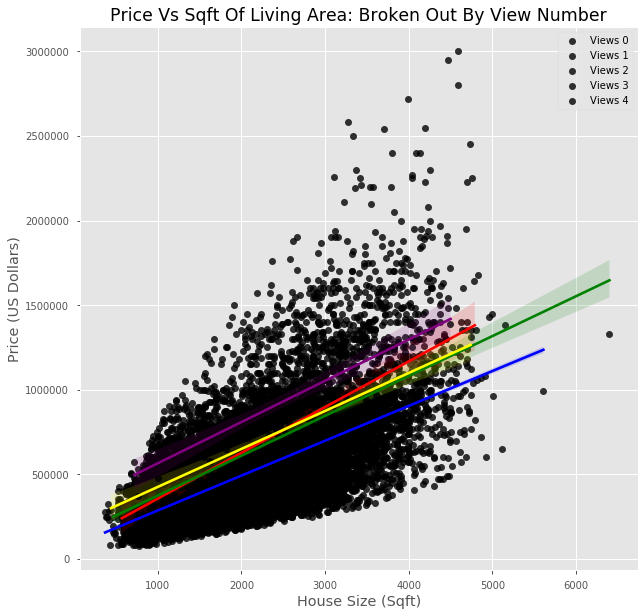

In [43]:
# copy the preprocessed data for manipulation without fear of altering the original data
dfTemp = dfPreprocessed.copy()

# Create new column for plotting the unaltered data
dfTemp['control'] = ['Control' for x in range(dfTemp.shape[0])]

# Create new column grouping square footage by the thousand
dfTemp['sqft_living_1000'] = dfTemp['sqft_living'].apply(lambda x: math.floor(x/1000))

# Initialize a figure
fig,ax = plt.subplots(1,1, figsize = (10,10))
sns.regplot(x ='sqft_living',y ='price', data = dfTemp.loc[dfTemp['view'] == 0],
                 line_kws = {'color':'blue'},
                 scatter_kws = {'color': 'black'},ax = ax,
                 label = 'Views 0');
sns.regplot(x ='sqft_living',y ='price', data = dfTemp.loc[dfTemp['view'] == 1],
                 line_kws = {'color':'red'},
                 scatter_kws = {'color': 'black'},ax = ax,
           label = 'Views 1');
sns.regplot(x ='sqft_living',y ='price', data = dfTemp.loc[dfTemp['view'] == 2],
                 line_kws = {'color':'green'},
                 scatter_kws = {'color': 'black'},ax = ax,
           label = 'Views 2');
sns.regplot(x ='sqft_living',y ='price', data = dfTemp.loc[dfTemp['view'] == 3],
                 line_kws = {'color':'yellow'},
                 scatter_kws = {'color': 'black'},ax = ax,
           label = 'Views 3');
sns.regplot(x ='sqft_living',y ='price', data = dfTemp.loc[dfTemp['view'] == 4],
                 line_kws = {'color':'purple'},
                 scatter_kws = {'color': 'black'},ax = ax,
           label = 'Views 4');

#                       y ='price',hue ='control',  
#                       data = dfTemp.loc[dfTemp['sqft_living_1000'] < 5], 
#                       color = 'black');

# Plot formatting adjustments
plt.title('Price Vs Sqft Of Living Area: Broken Out By View Number', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'x-large')
plt.xlabel('House Size (Sqft)', size = 'x-large')
plt.legend()
# axes.set_xticklabels(['0 - 1000', '1001 - 2000', '2001 - 3000', '3001 - 4000', '4001 - 5000']);
plt.show()

No handles with labels found to put in legend.


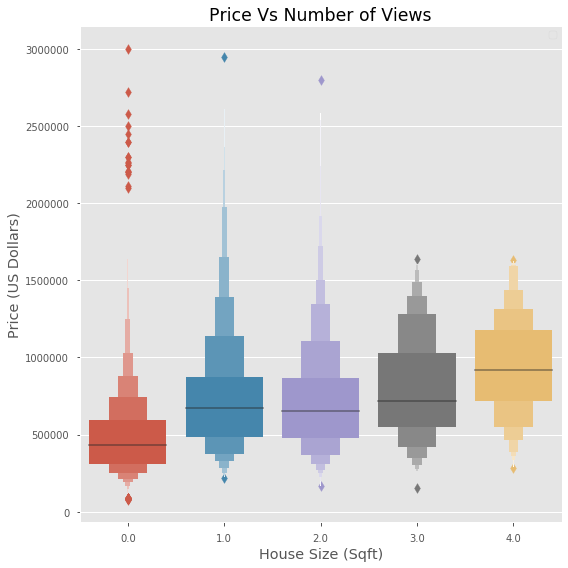

In [58]:
# copy the preprocessed data for manipulation without fear of altering the original data
dfTemp = dfPreprocessed.copy()

# Create new column for plotting the unaltered data
dfTemp['control'] = ['Control' for x in range(dfTemp.shape[0])]

# Initialize a figure and plot axes
plt.figure(figsize=(8,8))
axes = sns.boxenplot(x ='view',
                     y ='price', 
                     data = dfTemp);
# axes1 = sns.pointplot(x ='view',
#                       y ='price',hue ='control',  
#                       data = dfTemp, 
#                       color = 'black');

# Plot formatting adjustments
plt.title('Price Vs Number of Views', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'x-large')
plt.xlabel('House Size (Sqft)', size = 'x-large')
plt.legend()
plt.tight_layout()
plt.show()

While there is significant overlap, the general trend show by the visual confirms that increased number of views has a positive outcome on sale price. Because of this advertising should be a priority as a relatively low cost solution that will have a boost on your home price.

### Whether Of Not The Property Is On A Waterfront

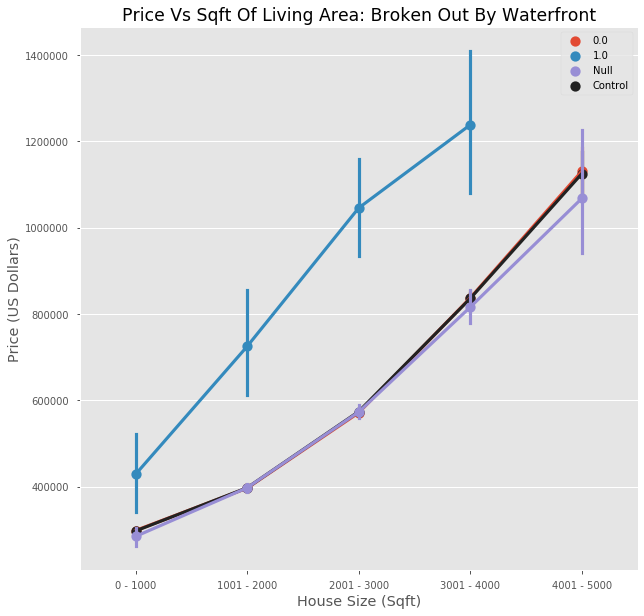

In [45]:
# copy the preprocessed data for manipulation without fear of altering the original data
dfTemp = dfPreprocessed.copy()

# Create new column grouping square footage by the thousand
dfTemp['sqft_living_1000'] = dfTemp['sqft_living'].apply(lambda x: math.floor(x/1000))

# Create new column for plotting the unaltered data
dfTemp['control'] = ['Control' for x in range(dfTemp.shape[0])]

# Initialize a figure and plot axes
plt.figure(figsize=(10,10))
axes = sns.pointplot(x ='sqft_living_1000',
                     y ='price',hue = 'waterfront', 
                     data = dfTemp.loc[dfTemp['sqft_living_1000'] < 5]);
axes1 = sns.pointplot(x ='sqft_living_1000',
                      y ='price',hue ='control',  
                      data = dfTemp.loc[dfTemp['sqft_living_1000'] < 5], 
                      color = 'black');

# Plot formatting adjustments
plt.title('Price Vs Sqft Of Living Area: Broken Out By Waterfront', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'x-large')
plt.xlabel('House Size (Sqft)', size = 'x-large')
plt.legend()
axes.set_xticklabels(['0 - 1000', '1001 - 2000', '2001 - 3000', '3001 - 4000', '4001 - 5000']);

## Correlation Matrix

In [46]:
correlations = np.abs(dfFinal.corr())
correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,lat,long,sqft_living15,year,waterfront_1.0,waterfront_Null,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
price,1.000000,0.311906,0.493911,0.631876,0.075238,0.297400,0.261021,0.044766,0.659319,0.260963,0.062326,0.481016,0.038839,0.570565,0.009037,0.073209,0.006398,0.136321,0.115491,0.196671,0.091666,0.134166,0.046225,0.052681,0.031127,0.012009,0.031602,0.022770,0.098954,0.161843,0.008623,0.055941,0.004668,0.062513,0.102311,0.102252,0.098840,0.124791,0.011878,0.093354,0.094112,0.172007,0.142385,0.032799,0.108541,0.082014,0.101864,0.047694,0.091204,0.003480,0.021154,0.006384,0.037667,0.096561,0.127309,0.061087,0.101582,0.068527,0.073690,0.104297,0.101397,0.046322,0.054266,0.079224,0.160061,0.089747,0.060434,0.067573,0.059588,0.092757,0.061614,8.451697e-03,0.031842,0.057362,0.026819,0.027278,0.087905,0.053746,0.046978,0.029954,0.157718,0.049968,0.107378,0.082408,0.116582,0.110317,0.012599,0.006181,0.011160,0.010261,0.003516,0.006768,0.022237,0.005189,0.037967,0.007872,0.020731,0.007849,0.004554,0.005282,0.005952,0.021199,0.018132
bedrooms,0.311906,1.000000,0.491019,0.615513,0.189445,0.163479,0.036882,0.027598,0.330964,0.273950,0.155579,0.020268,0.136280,0.390201,0.005480,0.033285,0.003671,0.002178,0.001713,0.039297,0.043486,0.064731,0.042715,0.048109,0.007529,0.021610,0.029118,0.001760,0.023704,0.013212,0.004069,0.023694,0.016063,0.007446,0.018589,0.018055,0.003447,0.027717,0.021601,0.018097,0.015463,0.071378,0.009923,0.011959,0.049478,0.026989,0.015478,0.014183,0.026902,0.060061,0.023127,0.046373,0.009147,0.041026,0.065992,0.024644,0.023526,0.012576,0.056458,0.019477,0.036192,0.047065,0.014919,0.015452,0.006602,0.027726,0.041333,0.061031,0.040439,0.017807,0.027280,2.307997e-02,0.074084,0.035876,0.052496,0.025007,0.029320,0.011930,0.007576,0.003424,0.045094,0.000539,0.005798,0.007791,0.021540,0.021944,0.012647,0.007568,0.001033,0.007816,0.002066,0.000346,0.003829,0.000871,0.000992,0.010845,0.017776,0.006375,0.006744,0.000965,0.006123,0.010275,0.006967
bathrooms,0.493911,0.491019,1.000000,0.738722,0.035013,0.508065,0.109401,0.129592,0.629044,0.227995,0.528566,0.013104,0.227986,0.545608,0.023642,0.002093,0.004477,0.031894,0.007750,0.028947,0.034422,0.062543,0.011824,0.003309,0.011411,0.027669,0.014458,0.027676,0.026232,0.003368,0.011002,0.066585,0.009632,0.081615,0.013772,0.012327,0.039587,0.038990,0.006822,0.070543,0.021841,0.066147,0.009598,0.005236,0.067020,0.059403,0.021079,0.006613,0.002791,0.049543,0.073611,0.021168,0.022951,0.075381,0.106161,0.039815,0.024446,0.011409,0.033955,0.003921,0.048428,0.007529,0.018576,0.004422,0.031030,0.050770,0.020522,0.060730,0.069983,0.009757,0.005109,5.250603e-02,0.072224,0.073191,0.033926,0.015519,0.072718,0.020333,0.058561,0.031853,0.103755,0.008316,0.055074,0.023517,0.046972,0.007678,0.013053,0.000387,0.006622,0.002927,0.004415,0.

## Un-Translating Feature Coefficients

Because our data has been transformed and standardized, the coefficients give the scale of the impact of each of the significant features. While this is useful information, it is also important to understand what the model offers as the dollar amount impact of any given feature. However, the transformation process isn't easy to untangle after the model has been created. Becuase of this, we are going to create an additional model using the un-transformed data. It is very important to understand that this second model will not be the same as the first. But, it will serve as a reasonable approximation to our originial mobel when wanting to consider real dollar implications. 

In [47]:
# We revert back to the preprocessed data and start again with building a model
dfNumeric2 = dfPreprocessed.select_dtypes(['int64', 'float64'])
dfCategory2 = dfPreprocessed.select_dtypes('category')
dfEncodedCategory = pd.get_dummies(dfCategory2)
dfFinal2 = pd.concat([dfNumeric2,dfEncodedCategory], axis = 1)
dfFinal2.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year,waterfront_0.0,waterfront_1.0,waterfront_Null,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650,2014,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,2014,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,47.7379,-122.233,2720,8062,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000,2014,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [48]:
# make the untranslated model and print out the summary
finalModel2, excludedCols = customModule.reduceModel(dfFinal2, 
                                                    features =list(dfFinal2[sigFeatures].columns), 
                                                    target = 'price', 
                                                    pThreshold = .05,
                                                    addConstant = True)
finalModel2.summary()

 The starting R-value for the model is 0.8210902442136012


The following columns have p-values above the threshold of 0.05: ['long', 'zipcode_98011', 'zipcode_98019', 'zipcode_98028', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98042', 'zipcode_98055', 'zipcode_98058', 'zipcode_98070', 'zipcode_98148', 'zipcode_98178', 'month_2']

The following columns have p-values above the threshold of 0.05: ['zipcode_98014']



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1266.
Date:                Sun, 23 Aug 2020   Prob (F-statistic):               0.00
Time:                        06:23:54   Log-Likelihood:            -2.7214e+05
No. Observations:               20823   AIC:                         5.444e+05
Df Residuals:                   20747   BIC:                         5.450e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.01e+08   1.09e+07     -9.231      0.000   -1.22e+08   -7.96e+07
bedrooms       -1.197e+04   1142.744    -10.478      0.000   -1.42e+04   -9734.334
bathrooms       2.074e+04   1953.071     10.617      0.000    1.69e+04    2.46e+04
sqft_living      145.0954      2.418     60.012      0.000     140.356     149.834
sqft_lot           0.3132      0.034      9.118      0.000       0.246       0.381
floors         -2.241e+04   2313.744     -9.686      0.000   -2.69e+04   -1.79e+04
view             4.51e+04   1370.892     32.898      0.000    4.24e+04    4.78e+04
condition       2.482e+04   1372.448     18.088      0.000    2.21e+04    2.75e+04
grade           5.583e+04   1348.896     41.393      0.000    5.32e+04    5.85e+04
sqft_basement    -58.8465      2.764    -21.292      0.000     -64.264     -53.429
yr_built        -764.7506     44.639    -17.132      0.000    -852.247    -677.254
lat             2.781e+05   1.19e+04     23.345      0.000    2.55e+05    3.01e+05
sqft_living15     27.2019      2.222     12.240      0.000      22.846      31.558
year            4.412e+04   5423.160      8.135      0.000    3.35e+04    5.47e+04
waterfront_1.0  2.867e+05   1.45e+04     19.756      0.000    2.58e+05    3.15e+05
zipcode_98004   5.901e+05   7690.974     76.726      0.000    5.75e+05    6.05e+05
zipcode_98005   2.363e+05   9590.176     24.643      0.000    2.18e+05    2.55e+05
zipcode_98006   2.028e+05   6071.979     33.398      0.000    1.91e+05    2.15e+05
zipcode_98007   1.668e+05      1e+04     16.602      0.000    1.47e+05    1.87e+05
zipcode_98008   1.581e+05   7438.545     21.259      0.000    1.44e+05    1.73e+05
zipcode_98010   8.624e+04   1.26e+04      6.868      0.000    6.16e+04    1.11e+05
zipcode_98022   2.556e+04   8894.365      2.873      0.004    8123.594     4.3e+04
zipcode_98023  -2.427e+04   5723.035     -4.241      0.000   -3.55e+04   -1.31e+04
zipcode_98024   7.198e+04   1.49e+04      4.818      0.000    4.27e+04    1.01e+05
zipcode_98027   1.215e+05   6208.794     19.573      0.000    1.09e+05    1.34e+05
zipcode_98029    1.49e+05   6919.975     21.530      0.000    1.35e+05    1.63e+05
zipcode_98033   2.511e+05   6513.617     38.555      0.000    2.38e+05    2.64e+05
zipcode_98034   8.135e+04   6153.371     13.221      0.000    6.93e+04    9.34e+04
zipcode_98038   1.898e+04   5312.403      3.572      0.000    8563.957    2.94e+04
zipcode_98039   9.091e+05   2.09e+04     43.472      0.000    8.68e+05     9.5e+05
zipcode_98040   4.094e+05   7913.756     51.728      0.000    3.94e+05    4.25e+05
zipcode_98045   6.569e+04   8492.277      7.736      0.000     4.9e+04    8.23e+04
zipcode_98052   1.396e+05   5826.812     23.958      0.000    1.28e+05    1.51e+05
zipcode_98053   1.179e+05   6885.563     17.119      0.000    1.04e+05    1.31e+05
zipcode_9805